In [101]:
# !python.exe -m pip install --upgrade pip
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install openpyxl
!pip install -U DoubleML
!pip install doubleml
!pip install bnlearn

In [102]:
# Подключим необходимые библиотеки
import numpy as np
import pandas as pd
import scipy as scipy
from copy import deepcopy
import math
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from scipy.stats import t, chi2, f, norm, poisson, binom, uniform, expon, logistic
import seaborn
import networkx as nx
from warnings import filterwarnings
filterwarnings("ignore")
import scipy as scipy
import random
from sklearn.naive_bayes import CategoricalNB             # наивный Байесовский классификатор

from sklearn.model_selection import train_test_split      # разделение выборки на
                                                          # обучающую и тестовую
from sklearn.model_selection import cross_val_score       # кросс-валидация
from sklearn.model_selection import KFold                 # разбиение на части (folds)
from sklearn.utils import shuffle                         # случайная перестановка
from sklearn.neighbors import KNeighborsClassifier        # метод ближайшие соседей
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier       # случайный лес (классификация)
from sklearn.ensemble import RandomForestRegressor        # случайный лес (регрессия)
from sklearn import tree                                  # решающие деревья
from sklearn.inspection import permutation_importance     # перестановочная важность
from scipy.stats import rankdata                          # ранжирование элементов
from sklearn.ensemble import BaggingClassifier            # бэггинг
from copy import deepcopy                                 # копирование объектов
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
import math
import bnlearn
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import doubleml as dml
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor


# 1. Обоснование темы

1. Придумайте непрерывную зависимую (целевую) переменную и бинарную переменную воздействия.


**Целевая переменная** - вес новорожденного в килограммах $\text{Weight}_{i}$.

**Переменная воздействия** - факт курения матери $\text{Smoking}_{i}$ (1 - курит, 0 - нет).

**Ненаблюдаемые переменные, порождающие эндогенность**:

*  $\text{Genes}_{i}$ - генетические факторы матери. Так как данная ненаблюдаемая переменная связана с курением, появляется эндогенность и необходимость в инструменте.


Обозначим также, что наша тема актуальна. [2024 год Указом Президента Российской Федерации Владимира Путина объявлен Годом семьи.](https://edu.gov.ru/family_year) А одной из главных задач российской политики на сегодняшний день является повышение рождаемости.

2. Опишите, для чего может быть полезно изучение влияния переменной воздействия на зависимую переменную. В частности, укажите, как эта информация может быть использована бизнесом или государственными органами.

Данная информация очень важна для изучения, так как вес новорожденного непременно влияет на его здоровье и дальнейшее развитие - набор веса и реализация ресурсов для роста малыша. Также вес новорожденного и дальнейшее его измерение через равные промежутки времени (например, по месяцам) позволяет выявить и определить определенные болезни. Поэтому важно знать изначальную точку - вес только что рожденного ребенка.

Переменная воздействия - курение матери, оказывает, согласно многочисленным статьям, отрицательное воздействие на здоровье малыша. Как мы узнали из дополнительного ресурса(Источник:https://clck.ru/3B4Wz2) курение вызывает мутацию в генах матери и, соответственно, ребенка, что негативно сказывается на его здоровье. Подробнее будет описано в пункте генерации данных.

Что касается использования информации госорганами, то нам кажется эта информация довольно важной на государственном уровне, так как дает представление и о новорожденном населении, и о его здоровье, и возможности его обеспечивать экономический рост, а также даже возможность предсказать здоровье будущего поколения, его численность, экономическое развитие и бюджет, который будет требоваться либо для поддержания населения, либо для улучшения его здоровья. Говоря о России, то рождаемость здесь низкая, качество здоровья в современном мире поддерживать трудно из-за неправильного питания, изобилия фастфуда, постоянной гонки и стресса, поэтому курение матери также усугубит данную ситуацию.

Что касается бизнеса, то это может восприниматься с двух сторон: так как курение, ни для кого не секрет, оказывает отрицательное воздействие на организм, то табачные компании будут терять покупателей-беременых женщин, однако нам кажется, что бросание курить ради вынашивания плода, то есть определенный промежуток времени, возьмем, допустим, 1,5 года, не приведет к сильным убыткам. Гораздо сильнее может воздействовать принцип ЗОЖ, распространяющийся на всех и навсегда. С другой стороны, многие наверняка захотят воспользоваться этой информацией с точки зрения получения прибыли, и например, будет предлагать товары или услуги по помощи избавления от курения навегда или замещению курения (то ли спорт, то ли другие виды "безопасных" сигарет).

3. Обоснуйте наличие причинно-следственной связи между зависимой переменной и переменной воздействия. Приведите не менее 2-х источников из научной литературы, подкрепляющих ваши предположения.


Основная статья, которую мы отыскали и считаем наиболее экспертной, это ["Maternal Smoking, Misclassification, and Infant Health" Tanguy Brachet](https://papers.ssrn.com/Sol3/papers.cfm?abstract_id=1009781) . Здесь рассматривались различные эффекты, например, как влияют налоги на курение и, что для нас представляло основной интерес, влияние курения на вес новорожденного. В статье отмечается, что это негативное влияние курения на плод нельзя отрицать. В статье подробно описаны экономические модели и методология, приведены ненаблюдаемые переменные и подход к попытке измерить эти данные (то есть борьба с эндогенностью, использование инструментальных переменных). Исследование довольно масштабное, поэтому мы приведем основные черты: были рассмотрены различные группы матерей, которые были разделены на расы и курящих/некурящих. Что касается модели, то была предложена линейная модель с прогнозированием веса новорожденного, где независимыми переменными выступали факт курения матери, вектор ее характеристик и ненаблюдаемые факторы или ошибка. Как говорится в статье, учитывая наблюдаемые различия в характеристиках курящих и некурящих, о которых они сами сообщили,
вполне разумно ожидать, что ненаблюдаемые факторы, определяющие массу тела при рождении, также будут различаться
в этих двух группах. Это обосновывает подход с использованием инструментальных переменных, при котором государственные
акцизы на сигареты влияют на дородовое курение матерей. Было отмечено, что в среднем дети рожденные курящими матерями на  200 грамм меньше, чем рожденные от некурящих, а также интересно то, что курящие женщины чаще, чем в другой группе, рожали недоношенных детей, в частости раньше 36 недели, в то время как нормой считается 39-40 недели.
Как уже было сказано, перменная воздействия - курение матери - негативно отражается на здоровье ребенка, и как мы предположили, отрицательно влияет на вес новорожденного. Связано это с тем, что курение матери воздействует на гены как матери, так и ребенка. А также в исследовании, которое подтверждает нашу точку зрения (["Исследование медико-социальных факторов влияния образа жизни беременных на состояние здоровья рожденных ими детей" / Никитина Н.Н. и др.](https://cyberleninka.ru/article/n/issledovanie-mediko-sotsialnyh-faktorov-vliyaniya-obraza-zhizni-beremennyh-na-sostoyanie-zdorovya-rozhdennyh-imi-detey/viewer)), сказано, что факт курения матери до или во время беременности сильно снижал вес новорожденного в отличие от группы малышей некурящих матерей. А также согласно второму исследованию (["Влияние табакокурения на гестационный прирост массы тела беременных и массу их новорожденных"/ Покусаева В.Н. и др.](https://cyberleninka.ru/article/n/vliyanie-tabakokureniya-na-gestatsionnyy-prirost-massy-tela-beremennyh-i-massu-ih-novorozhdennyh?ysclid=lx02p0s9aw783231945), ), курящие матери набирали меньше килограммов во время беременности в связи с подавлением чувства голода с помощью сигарет, поэтому и дети рождались у них с меньшей массой тела.

4. Кратко опишите результаты предшествовавших исследований по схожей тематике и критически оцените методологию этих работ с точки зрения гибкости (жесткости предпосылок) использовавшихся методов эконометрического анализа.

В "Исследовании медико-социальных факторов влияния образа жизни беременных на состояние здоровья рожденных ими детей" Никитиной Н.Н. и др. говорится о выборке из 175 мам, которые употребляли алкоголь и/или курили. Методология данного исследования показалась довольно скудной, однако все-таки решили сослаться на него, так как нас интересуют прежде всего российские исследования. Выборка на наш взгляд мала, а такие индивидуальные факторы как здоровье матери (как отдельный оцененный фактор - например, как шкала - не был включен в изучение, на сколько мы поняли. Это было бы отличным дополнением, несмотря на то, что были конкретные методы отбора матерей по заболеваниям и анализам, но наличие шкалы здоровья не помешало бы воспринимать лучше информацию), финансовое положение, социальные факторы не были достаточно учтены или описаны в исследовании.
Еще один ограничивающий фактор - это взвешивание и наблюдение за матерями в определенный сезон - летом. Мы думаем, что исследование выборок с примерно равным количеством родившихся детей в каждый месяц/квартал давало бы более достоверную картину, потому что матери, рожающие летом или зимой по разному проводят и свой досуг, и вероятность заболеваний разная, и погодные факторы (например, беременность в период аллергий также влияет на плод).
Стоит отметить в целом ограниченность и сложность моделирования веса младенцев из-за сложности отслеживания и фактического здоровья матери, и наблюдения рождения детей в определенный период.
То есть предпосылки достаточно размытые, сами методы обозначены довольно смутно, скорее всего это исследование не включало какой-то продвинутый регрессионный анализ. Неясно обозначены огранчивающие факторы, которые приводят к эндогенности и интресено было бы проследить мультиколлинеарность факторов.

Что касается второго исследования "Влияние табакокурения на гестационный прирост массы тела беременных и массу их новорожденных" Покусаевой и др. также отмечается выборка из 175 матерей, однако в данном исследовании намного более детально подходят к женскому здоровью, отмечая важность наличия перед беременностью эндокринных нарушений, то есть это ненаблюдаемый фактор, так как он может быть неизвестен и никак не проявляться. Включая в ииследование ИМТ, который может быть свидетем данных заболеваний, исследователи, можно сказать, борются с эндогенностью. Также важно отметить, что в данном исследовании матери были разделены на 3 группы: курящие во время беременности, прекратившие курить с началом беременности и курившие в начале беременности, а также отрицающие факт курения. Это, конечно, добавляет информативности исследованию, так как было замечено различие между разными группами матерей, например, рождение маловесных детей было статистически выявлено только в первой группе постоянно курящих матерей.
Данное исследование довольно хорошо и понятно описивыет и методологию и результаты, приводя статистические данные, однако мы считаем, что способы вычисления тех или иных статистик также не было бы лишним прописать.



5. Придумайте хотя бы 3 контрольные переменные, по крайней мере одна из которых должна быть бинарной и хотя бы одна – непрерывной. Кратко обоснуйте выбор каждой из них.

**Контрольные переменные**:

*   $\text{Age}_{i}$ - возраст матери. Данная переменная поможет рассмотреть, как возраст матери влияет на курение.
*   $\text{Full_term}_{i}$ - факт рождения доношенного ребенка (1 - доношен, 0 - нет). Эта переменная рассматривается со стороны влияния курения на состояние ребенка.
*   $\text{Married}_{i}$ - семейный статус (1 - в браке, 0 - холостой). Влияние семейного положения на курение.
*   $\text{Income}_{i}$ - общий доход семьи в тысячах рублей (мать + отец). Влияние дохода семьи на курение.



6. Придумайте бинарную инструментальную переменную и обоснуйте, почему она удовлетворяет необходимым условиям.


**Инструментальная переменная** - факт наличия у матери в ближайшем окружении курящих людей $\text{Smoking_friends}_{i}$ (1 - есть, 0 - нет).

Она удовлетворяет необходимым условиям, так как связана с фактором курения матери, но никак не связана с весом новорожденного ребенка.
Также, благодаря данной пременной, мы предполагаем для нашего исследования, что условная вероятность факта наличия курящих друзей у матери положительно связана с доходом и браком, а с доношенностью ребенка и возрастом - отрицательно.


# 2. Генерация и предварительная обработка данных




## **1. Опишите математически предполагаемый вами процесс генерации данных.**


Будем генерировать возраст матери $\text{Age}_{i}$ взяв за основу нормальное распределение $\text{N}\left(29, 7^2\right)$.
Переменную $\text{Income}_{i}$ будем генерировать с помощью нормального распределения $\text{N}\left(100, 40^2\right)$ , предполагая, что средний доход семьи 100 000 рублей.
Поскольку $\text{Married}_{i}$ является бинарной переменной, принимающей значения $0$ и $1$, то она имеет распределение Бернулли $\text{Married}_{i}\sim\text{Ber}(p)$. Предположим, что в в браке рожают $75\%$ женщин, откуда $p=0.75$.
По аналогии сгенерируем переменную на рождение доношенного ребенка, предполагая $\text{Full_term}_{i}\sim\text{Ber}\left(0.9\right)$.

Ниже перед каждой генерацией контрольных переменных, ненаблюдаемой переменной, инструментальной, переменной воздействия и целевой прописываем используемый математический процесс.

##**2. Кратко обоснуйте предполагаемые направления связей зависимой переменной и переменной воздействия с контрольными переменными.**

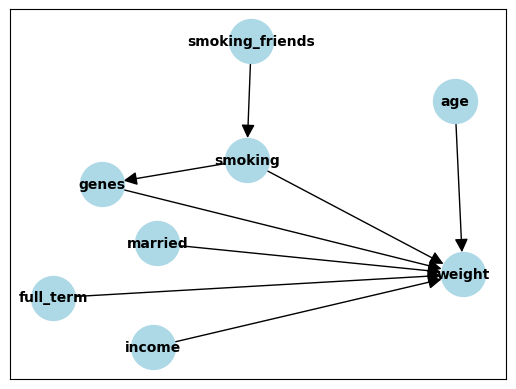

In [103]:
# Визуализируем предполагаемые связи

# Стиль отображения графика

nx_options = {
    'with_labels': True,
    'node_size': 1000,
    'node_color': 'lightblue',
    'font_size': 10,
    'font_weight': 'bold',
    'arrowsize': 20,
}

# Связи
edges = [
    ('age', 'weight'),         # (откуда стрелочка, куда стрелочка)
    ('income', 'weight'),
    ('full_term', 'weight'),
    ('married', 'weight'),
    ('genes', 'weight'),
    ('smoking', 'weight'),
    ('smoking', 'genes'),
    ('smoking_friends', 'smoking'),

]

# Инициализируем граф
G = nx.DiGraph(directed = True)
G.add_edges_from(edges)

# Отображаем граф
np.random.seed(8)
nx.draw_networkx(G, arrows = True, **nx_options)

На вес ребенка беременной женщины влияют возраст, гены, курит или нет, семейное положение матери, доход семьи и фактор доношенности ребенка. В свою очередь окружение беременной влияет на то, курит она или нет, а далее и курение влияет на гены матери, что мы подтверждаем ресурсом, указанным ниже.

##**3. Симулируйте данные в соответствии с предполагаемым вами процессом и приведите корреляционную матрицу, а также таблицу со следующими описательными статистиками:**

###**Генерация контрольных переменных** ⭐

Будем генерировать возраст матери $\text{Age}_{i}$ взяв за основу нормальное распределение $\text{N}\left(29, 7^2\right)$.

In [104]:
# Число наблюдений
n = 10000

По статье: "Средний возраст женщины при рождении ребенка составил 28 лет и 7 месяцев." Поэтому мы округлили и взяли средний возраст равный 29 годам.
Стандартное отклонение подбиралось так, чтобы разброс составлял примерно 2 стандартных отклонения от среднего в обе стороны.
Источник: https://dzen.ru/a/Yqm1W4LPgXvJUibX

In [105]:
np.random.seed(123)
age = norm.rvs(size = n, loc = 29, scale = 7)

# Для красоты ограничим минимальные и максимальные значения
age[age >= 55] = 55
age[age <= 14]  = 14

# Также, для удобства введем округление
age = np.round(age)

# Посмотрим на несколько первых значений
print(age[0:10])

[21. 36. 31. 18. 25. 41. 14. 26. 38. 23.]


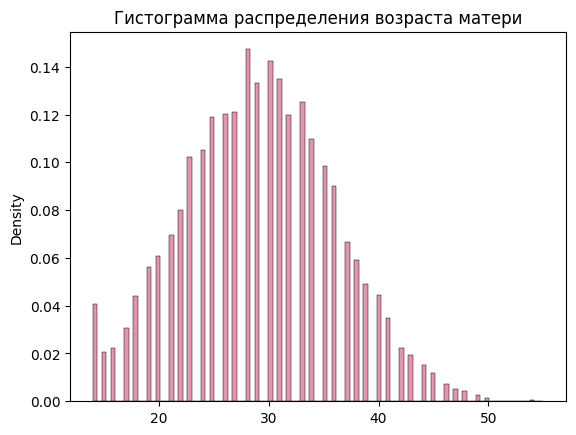

In [106]:
# Посмотрим на распределение
seaborn.histplot(age,                 # данные
                 stat = 'density',           # тип гистограммы
                 color = "palevioletred",    # цвет гистограммы
                 label = "histogram",        # наименование гистограммы
                 bins = 100)                 # число столбиков в Гистограмме
plt.title('Гистограмма распределения возраста матери')
plt.show()

Генерируем переменную $\text{Income}_{i}$, предполагая, что средний доход семьи 100 000 рублей.



In [107]:
np.random.seed(12)
income = norm.rvs(size = n, loc = 100, scale = 40)

# Для красоты ограничим минимальные и максимальные значения
income[income >= 200] = 200
income[income <= 15]  = 15

# Также, для удобства введем округление
income = np.round(income)

# Посмотрим на несколько первых значений
print(income[0:10])

[119.  73. 110.  32. 130.  39. 100.  95.  68. 200.]


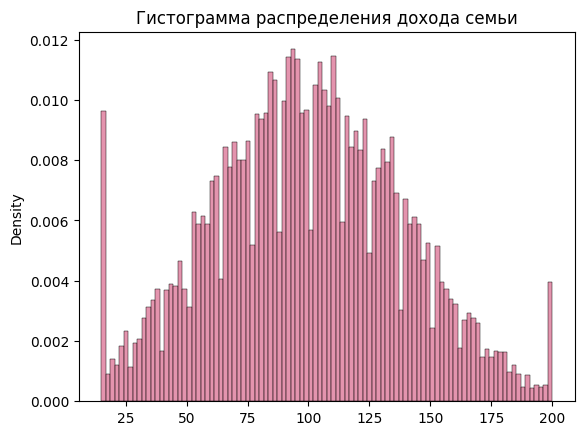

In [108]:
# Посмотрим на распределение
seaborn.histplot(income,                 # данные
                 stat = 'density',           # тип гистограммы
                 color = "palevioletred",    # цвет гистограммы
                 label = "histogram",        # наименование гистограммы
                 bins = 100)                 # число столбиков в Гистограмме
plt.title('Гистограмма распределения дохода семьи')
plt.show()

Поскольку $\text{Married}_{i}$ является бинарной переменной, принимающей значения $0$ и $1$, то она имеет распределение Бернулли $\text{Married}_{i}\sim\text{Ber}(p)$. Предположим, что в в браке рожают $75\%$ женщин, откуда $p=0.75$.

• Для бинарных переменных: доля и количество единиц.


In [109]:
# Сгенерируем переменную на факт состояния в браке
np.random.seed(123)
married = np.random.binomial(n = 1, p = 0.75, size = n)

# Посмотрим на первые несколько значений

print(married[0:10])

[1 1 1 1 1 1 0 1 1 1]


In [110]:
#количество единиц
np.count_nonzero(married==1)

7553

In [111]:
# Доля рожениц, состоящих в браке
print(np.mean(married))

0.7553


По аналогии сгенерируем переменную на рождение доношенного ребенка, предполагая $\text{Full_term}_{i}\sim\text{Ber}\left(0.9\right)$.

"В мире, по данным Всемирной организации здравоохранения, ежегодно 15 миллионов детей рождаются раньше срока — до истечения 37-й недели беременности. Это каждый десятый ребенок." Поэтому мы рассматриваем вероятность равную 0,9.

Источник: https://clck.ru/3B4WpJ

In [112]:
full_term = np.random.binomial(n = 1, p = 0.9, size = n)
#доля доношенных детей
print(np.mean(full_term))

0.8974


In [113]:
#количество единиц
np.count_nonzero(full_term==1)

8974

In [114]:
df = pd.DataFrame()
df['age']=age
df['income']=income
df['married']=married
df['full_term']=full_term
df.head()

,age,income,married,full_term
0,21.0,119.0,1,1
1,36.0,73.0,1,1
2,31.0,110.0,1,1
3,18.0,32.0,1,1
4,25.0,130.0,1,1


In [115]:
df.corr()
#корреляции очень маленькие, это нормально,
#мы генерировали переменные как независимые

,age,income,married,full_term
age,1.000000,-0.001369,0.002931,-0.016888
income,-0.001369,1.000000,0.002596,0.005589
married,0.002931,0.002596,1.000000,-0.022278
full_term,-0.016888,0.005589,-0.022278,1.000000


• Для непрерывных переменных: выборочное среднее, выборочное стандартное отклонение, медиана, минимум и максимум.

In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10000.0,29.1046,6.902335,14.0,24.0,29.0,34.0,55.0
income,10000.0,99.6580,38.987414,15.0,72.0,99.0,127.0,200.0
married,10000.0,0.7553,0.429931,0.0,1.0,1.0,1.0,1.0
full_term,10000.0,0.8974,0.303451,0.0,1.0,1.0,1.0,1.0


###**Генерация ненаблюдаемой переменной, порождающей эндогенность** ⭐

"[Курение вызывает изменения в генах, которые могут привести к риску развития онкологических заболеваний и диабета — установили шведские учёные](https://clck.ru/3B4Wz2)."
Получается, что у матерей, которые курят, происходят изменения в процессе экспрессии генов, что приводит к ненормальной активности генов. Это означает, что преобразование генетической информации в клеточные структуры и функции у них отличается от того, что происходит у некурящих матерей и может определять развитие различных заболеваний.

Сгенерируем гены $\text{Genes}_{i}$ , взяв за основу распределение Стьюдента с $8$ степенями свободы, как было в консультации. Предположим, что генетические факторы матери можно оценить по шкале от 1 до 100. Также предположим, что в основном в нашей выборке хорошие гены, так как женщины с большими проблемами со здоровьем часто не могут иметь детей. Это отразится в матожидании.

Эта переменная будет играть роль ненаблюдаемой, отсутствие в данных которой и приводит к проблеме эндогенности.

In [117]:
# Генерируем гены
np.random.seed(123)
genes = t.rvs(size = n, df = 8)

# Приведем гены к более удобной шкале
genes = (genes) * 10 + 70

# Также, для удобства введем округление и возьмем модуль
genes = np.round(np.abs(genes) + 1)

# Для удобства ограничим максимальное и минимальное значения
genes[genes >= 100] = 100
genes[genes <= 1]   = 1

# Посмотрим на несколько первых значений
print(genes[0:10])

[62. 87. 43. 68. 90. 73. 81. 84. 55. 64.]


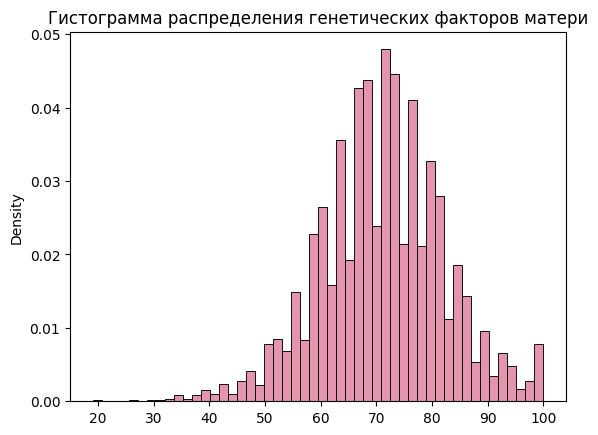

In [118]:
# Посмотрим на распределение генов
seaborn.histplot(genes,                  # данные
                 stat  = 'density',          # тип гистограммы
                 color = "palevioletred",    # цвет гистограммы
                 label = "histogram",        # наименование гистограммы
                 bins  = 50)                 # число столбиков в Гистограмме
plt.title('Гистограмма распределения генетических факторов матери')
plt.show()

###**Генерация инструментальной переменной** ⭐

Для того, чтобы сгенерировать бинарную переменную как функцию от других переменных, необходимо сперва предположить форму условных вероятностей. Для этого удобно применять следующий алгоритм:

1.   Записать **индекс**, который отражает статистические связи инструментальной переменной с контрольными переменными.
2.   Сформировать условные вероятности взяв функцию распределения от этого индекса

Например, предположим, что условная вероятность факта наличия курящих друзей у матери положительно связана с доходом и браком, а с доношенностью ребенка и возрастом - отрицательно.

$$\text{P}\left(\text{Smoking_friends}_{i} = 1|\text{Age}_{i}, \text{Full_term}_{i}, \text{Income}_{i}, \text{Married}_{i}\right) = \Phi\left(\underbrace{\frac{0.2 * \text{Income}_{i}-0.1 * \text{Age}_{i}}{ (6 + \text{Full_term}_{i} - \text{Married}_{i})} + 0.5*\text{Full_term}_{i}\times\text{Married}_{i} - 2}_{\text{индекс}}\right)$$

Где $\Phi()$ - функция распределения стандартного нормального распределения.



In [119]:
# Сформируем индекс
smoking_friends_index = (0.2 * income - 0.1*age) / (6 + full_term - married)+ 0.5*full_term * married - 2

In [120]:
# Создадим условные вероятности
np.random.seed(123)
smoking_friends_prob = norm.cdf(smoking_friends_index)

# Посмотрим на несколько первых условных вероятностей
print(smoking_friends_prob[0:10])

[0.98285593 0.63055866 0.95052853 0.23167757 0.99216832 0.1885281
 0.74445547 0.89972743 0.48404656 0.99999914]


In [121]:
np.random.seed(123)
smoking_friends = np.random.binomial(n = 1, p = smoking_friends_prob, size = n)

# Посмотрим на несколько сгенерированных значений
print(smoking_friends[0:10])

[1 1 1 0 1 0 0 1 0 1]


In [122]:
np.count_nonzero(smoking_friends==1)

7565

Желательно, чтобы дисперсия индекса отличалась от дисперсии распределения, чья функция распределения используется на втором шаге алгоритма, не более, чем в $2$ раза. В противном случае оценки параметров такой модели могут оказаться либо слишком точными, либо слишком неточными.

In [123]:
# Дисперсия индекса
print(np.var(smoking_friends_index))
# все хорошо

1.8052521267672905


Убедитесь, что доля единиц в сформированной переменной является адекватной. В случае наличия слишком малого или слишком большого числа единиц можно, например, отнять или прибавить константу к индексу.

In [124]:
# Доля матерей с курящими друзьями
print(np.mean(smoking_friends))

0.7565


###**Генерация переменной воздействия** ⭐

Удобно предположить, что условные вероятности переменной воздействия зависят от контрольных переменных, инструментальной переменной и ненаблюдаемой переменной.

$$P(\text{Smoking}_{i} = 1|\text{Smoking_friends}_{i}, \text{Age}_{i}, \text{Full_term}_{i}, \text{Married}_{i}, \text{Income}_{i}, \text{Genes}_{i}) = \\ = F_{\text{Logistic}}\left(-200+3\times\text{Genes}_{i} - 2\times\sqrt{\text{Age}_{i}} - 0.7\times\text{Income}_{i}\times\text{Married}_{i} + 4\times\text{Full_term}_{i} + 12\times\text{Smoking_friends}_{i}\right)$$

Где $F_{\text{Logistic}}$ - функция распределения стандартного логистического распределения.

Для краткости введем обозначение для условной вероятности курения матери при конкретном факте наличия курящих друзей:

$$p_{k}^{\text{Smoking_friends}_{i}} = P(\text{Smoking}_{i} = 1|\text{Age}_{i}, \text{Full_term}_{i}, \text{Married}_{i}, \text{Income}_{i}, \text{Genes}_{i}, \text{Smoking_friends}_{i} = k)\text{, где }k\in\{0,1\}$$

Для того, чтобы впоследствии анализировать локальные средние эффекты воздействия $\text{LATE}$, необходимо различать величину переменной воздействия $\text{Smoking}_{i}$ в зависимости от значения инструмента $\text{Smoking_friends}_{i}$. Для этого рассмотрим ни от чего не зависящую равномерную случайную величину $U_{i}\sim U(0,1)$ и введем гипотетические переменные:

$$\text{Smoking}_{1i} = I(p_{1}^{\text{Smoking_friends}_{i}}\geq U_{i})$$

$$\text{Smoking}_{0i} = I(p_{0}^{\text{Smoking_friends}_{i}}\geq U_{i})$$


$$I(\text{условие}) = \begin{cases}1\text{, если условие выполнено}\\0\text{, в противном случае}\end{cases}$$

Переменные $\text{Smoking}_{1i}$ и $\text{Smoking}_{0i}$ отражают потенциальное курение матери в зависимости от наличия курящих друзей.

In [125]:
# Равномерные случайные величины
np.random.seed(123)
u = uniform.rvs(size = n)
u

array([0.69646919, 0.28613933, 0.22685145, ..., 0.98514494, 0.22066212,
       0.61329717])

In [126]:
# Сгенерируем часть индекса, не зависящую от наличия курящих друзей
smoking_index = 3 * genes - 2*np.sqrt(age) + 4* full_term - 0.7*income* married - 200
smoking_index

array([-102.46515139,    1.9       , -155.13552873, ...,   54.80196097,
        -29.38912529,  -64.1       ])

In [127]:
# Симулируем курение матери в случае,
# когда у  нее есть курящие друзья
smoking_friends1    = 1
smoking1_index = smoking_index + 12 * smoking_friends1
smoking1_prob  = logistic.cdf(smoking1_index)
smoking1       = (smoking1_prob >= u).astype(int)

# Доля  курящих матерей, когда у них есть курящие друзья
np.mean(smoking1)

0.2604

In [128]:
# Симулируем курение матери в случае,
# когда у  нее нет курящих друзей
smoking_friends0    = 0
smoking0_index = smoking_index + 12 * smoking_friends0
smoking0_prob  = logistic.cdf(smoking0_index, scale = 1)
smoking0       = (smoking0_prob >= u).astype(int)

# Доля  курящих матерей, когда у них нет курящих друзей
np.mean(smoking0)

0.1904

Индивидов можно разделить на $4$ группы:


*   **Always takers** - те, у кого $\text{Smoking}_{0i}=\text{Smoking}_{1i}=1$: курят вне зависимости от наличия курящих друзей.
*   **Never takers**- те, у кого $\text{Smoking}_{0i}=\text{Smoking}_{1i}=0$: не курят независимо от наличия курящих друзей.
*   **Compliers** - те, у кого $\text{Smoking}_{1i}=1$ и $\text{Smoking}_{0i}=0$, то есть $\text{Smoking}_{1i} > \text{Smoking}_{0i}$: курят лишь тогда, когда есть курящие друзья.
*   **Deniers** - те, у кого $\text{Smoking}_{1i}=0$ и $\text{Smoking}_{0i}=1$, то есть $\text{Smoking}_{1i} < \text{Smoking}_{0i}$:  курят тогда, когда нет курящих друзей.

Для соблюдения предпосылок используемых методов важно отсутствие Deniers, что гарантируется используемым процессом генерации данных.

In [129]:
# Рассмотрим различные группы индивидов
ind_type = np.empty(n, dtype = 'U25')
ind_type[(smoking1 == 1) & (smoking0 == 1)] = 'Always taker'
ind_type[(smoking1 == 0) & (smoking0 == 0)] = 'Never taker'
ind_type[smoking1 > smoking0]               = 'Complier'
ind_type[smoking1 < smoking0]               = 'Denier'

# Посмотрим на распределение индивидов разного типа
print(pd.value_counts(ind_type))

Never taker     7396
Always taker    1904
Complier         700
Name: count, dtype: int64


In [130]:
# Сравним факт курения матери, когда у нее есть курящие друзья и нет
print(pd.DataFrame(data    = np.
array([smoking0, smoking1, ind_type]).transpose(),
                   columns = ['smoking0', 'smoking1', 'Тип индивида']))

     smoking0 smoking1  Тип индивида
0           0        0   Never taker
1           1        1  Always taker
2           0        0   Never taker
3           0        0   Never taker
4           0        0   Never taker
...       ...      ...           ...
9995        0        0   Never taker
9996        0        0   Never taker
9997        1        1  Always taker
9998        0        0   Never taker
9999        0        0   Never taker

[10000 rows x 3 columns]


Наблюдаемый (в данных) факт курения матери:

$$\text{Smoking}_{i} = \begin{cases}\text{Smoking}_{1i}\text{, если }\text{Smoking_friends}_{i} = 1\\ \text{Smoking}_{0i}\text{, если }\text{Smoking_friends}_{i} = 0\end{cases} = \\ = \text{Smoking}_{1i}\times\text{Smoking_friends}_{i} + \text{Smoking}_{0i}\times\left(1 - \text{Smoking_friends}_{i}\right)$$

In [131]:
# Факт курения матери при наличии у нее курящих друзей
smoking = smoking1 * smoking_friends + smoking0 * (1 - smoking_friends)

# Доля курящих матерей
print(np.mean(smoking))

0.2267


**Важно**

*   При слабой корреляции между $\text{Smoking}_{i}$ и $\text{Genes}_{i}$ проблема эндогенности окажется несущественной, а при слишком большой скорректировать эндоенность окажется чрезвычайно сложно.
*   При слабой корреляции между $\text{Smoking}_{i}$ и $\text{Smoking_friends}_{i}$ инструмент не будет валидным и поэтому не позволит скорректировать эндогенность.

Таким образом, желательно сделать так, чтобы корреляции находились в некотором разумном диапазоне:

$$0.8\geq|\text{Corr}\left(\text{Smoking}_{i}, \text{Genes}_{i}\right)|\geq0.2$$

$$0.8\geq|\text{Corr}\left(\text{Smoking}_{i}, \text{Smoking_friends}_{i}\right)|\geq0.2$$

In [132]:
# Рассмотрим корреляции
print(pd.DataFrame(data    = [np.corrcoef(smoking, genes)[0, 1],
                              np.corrcoef(smoking, smoking_friends)[0, 1]],
                   index   = ['Corr(smoking, genes)',
                              'Corr(smoking, smoking_friends)'],
                   columns = ['Оценка']))

                                  Оценка
Corr(smoking, genes)            0.476336
Corr(smoking, smoking_friends) -0.214792


###**Генерация целевой переменной** ⭐

Сформируем представления о формировании потенциального веса новорожденного в зависимости от курения матери.

**Основная идея**- отдача от дохода семьи и генетических факторов выше в случае, когда мать не курит.

Уравнение веса младенца при отсутствии курения матери:

$$\text{Weight}_{0i} = \underbrace{\underbrace{150 + 15\times\text{Genes}_{i}}_{g_{0}^{\text{unobs}}} + \underbrace{70\times\frac{\text{Income}_{i}}{5 - \text{Married}_{i} - \text{Full_term}_{i}}-30\times ln({Age}_{i})}_{g_{0}^{\text{obs}}}}_{g_{0}} + \varepsilon_{0i}\text{, где }\varepsilon_{0i}\sim \left(8\times t(15)\right)$$

Мы предположили, что у более молодых мам рождаются более здоровые (тяжелые) дети, поэтому знак перед возрастом отрицательный. Однако, эта зависимость неочевидна, поэтому мы поставили возраст в логарифм и добавили перед ним не очень большой коэффициент.

Уравнение веса младенца при курении матери:

$$\text{Weight}_{1i} = \underbrace{\underbrace{11\times \text{Genes}_{i}}_{g_{1}^{\text{unobs}}} + \underbrace{50\times \frac{\text{Income}_{i}}{5 - \text{Married}_{i} - \text{Full_term}_{i}}-50\times ln({Age}_{i})}_{g_{1}^{\text{obs}}}}_{g_{1}} + \varepsilon_{1i}\text{, где }\varepsilon_{1i}\sim \left(\text{EXP}(0.1) - 10\right)$$

Отметим также предположение, что, чем старше мать, тем дольше, возможно, она курит, поэтому здесь коэффициент перед логарифмом возраста побольше.

Наблюдаемый вес новорожденного:

$$\text{Weight}_{i} = \begin{cases}\text{Weight}_{1i}\text{, если }\text{Smoking}_{i}=1\\ \text{Weight}_{0i}\text{, если }\text{Smoking}_{i}=0\end{cases} = \\ =\text{Weight}_{1i}\times\text{Smoking}_{i} + \text{Weight}_{0i}\times\left(1-\text{Smoking}_{i}\right)$$

In [133]:
# Случайные ошибки
np.random.seed(234)
error0 = t.rvs(size = n, df = 15) * 8
error1 = expon.rvs(size = n, scale = 10) - 10

# Функция от контрольных переменных
  # когда мать не курит
g0_obs   = (70 * income / (5 - full_term - married)) - 30*np.log(age)
g0_unobs =  150 + 15 * genes
g0       = g0_obs + g0_unobs
  # когда мать курит
g1_obs   = (50* income / (5 - full_term - married))- 50*np.log(age)
g1_unobs =  11 * genes
g1       = g1_obs + g1_unobs

# Вес в зависимости от факта курения матери
weight0 = g0 + error0
weight1 = g1 + error1

# Наблюдаемый вес новорожденного
weight = weight1 * smoking + weight0 * (1 - smoking)

Проверим адекватность полученной размерности:

In [134]:
weight.mean()

3015.259195201176

Во избежание чрезвычайно точных или крайне неточных оценок, желательно, чтобы при каждом $j\in\{0, 1\}$ дисперсии $\varepsilon_{ji}$, $g_{j}$, $g_{j}^{\text{obs}}$ и  $g_{j}^{\text{unobs}}$ различались не более, чем в $5$ раз.

In [135]:
# Приблизительно оценим адекватность дисперсий
print(pd.DataFrame(data    = [np.var(error0),   np.var(g0),
                              np.var(g0_obs),   np.var(g0_unobs),
                              np.var(error1),   np.var(g1),
                              np.var(g1_obs),   np.var(g1_unobs)],
                   index   = ['Var(eps0)',     'Var(g0)',
                              'Var(g0_obs)',   'Var(g0_unobs)',
                              'Var(eps1)',     'Var(g1)',
                              'Var(g1_obs)',   'Var(g1_unobs)'],
                   columns = ['Оценка']))

                      Оценка
Var(eps0)          71.634895
Var(g0)        815187.031266
Var(g0_obs)    788369.625081
Var(g0_unobs)   28130.408494
Var(eps1)         104.146087
Var(g1)        416828.597855
Var(g1_obs)    402391.583443
Var(g1_unobs)   15127.908568


**Объединение данных** 😸

In [136]:
# Аггрегируем данные в датафрейм
df = pd.DataFrame({'weight': weight, 'smoking': smoking,
                   'age': age,'income': income, 'married': married,
                   'full_term': full_term, 'smoking_friends': smoking_friends,
                   'genes': genes})
df = df.loc[0:n, :]

# Посмотрим на симулированные данные
df.head(10)#.style.format(precision = 2)

,weight,smoking,age,income,married,full_term,smoking_friends,genes
0,3773.587751,0,21.0,119.0,1,1,1,62.0
1,1989.784386,1,36.0,73.0,1,1,1,87.0
2,3251.918891,0,31.0,110.0,1,1,1,43.0
3,1840.805003,0,18.0,32.0,1,1,0,68.0
4,4428.097002,0,25.0,130.0,1,1,1,90.0
5,2038.116741,0,41.0,39.0,1,1,0,73.0
6,2003.137584,1,14.0,100.0,0,1,0,81.0
7,2962.406917,0,26.0,95.0,1,0,1,84.0
8,2068.871822,0,38.0,68.0,1,0,0,55.0
9,5676.022416,0,23.0,200.0,1,1,1,64.0


##**4. Разделите выборку на обучающую и тестовую.**
Тестовая выборка должна включать от 20% до 30% наблюдений.

In [137]:
target   = df.loc[:, ['smoking']]            # целевая переменная
features = df.loc[:, ["married", "full_term",'age','income','smoking_friends']]    # матрица признаков
target   = np.squeeze(target)                # преобразуем из вектора столбца
                                             # в одномерный массив

In [138]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.2, random_state = 777)

In [139]:
print(features_train.index.size, features_test.index.size) # признаки
print(target_train.index.size, target_test.index.size)     # целевая переменная

8000 2000
8000 2000


#3. Классификация

##**1. Отберите признаки, которые могут быть полезны при прогнозировании переменной воздействия и кратко обоснуйте выбор каждой из них.**
Не включайте в число этих признаков целевую переменную.


Выше мы уже отобрали нужные переменные. Мы не включили ненаблюдаемую переменную генетических факторов, но включили инструментальную переменную - наличие курящих друзей в ближайшем окружении матери.

##**2. Выберите произвольные значения гиперпараметров, а затем оцените и сравните(между методами) точность прогнозов:**




Начнем с наивного Байесовского классификатора.

Используем метод "биннинг" для применения наивного Байесовского классификатора, чтобы непрерывные переменные не принимали слишком много различных значений, что поможет не привести к существенной фрагментации данных и, как следствие, к проклятью размерности.

In [140]:
# Для добавления переменной на доход разобьем ее по квантилям
df['income_bin'] = pd.qcut(df['income'],   # разбиваемая переменная
                           q = 4)          # число квантилей (равных разбиений)
df['income_bin'].value_counts()            # распределение значений
df['age_bin'] = pd.qcut(df['age'],   # разбиваемая переменная
                           q = 4)          # число квантилей (равных разбиений)
df['age_bin'].value_counts()            # распределение значений


age_bin
(24.0, 29.0]      2626
(13.999, 24.0]    2596
(29.0, 34.0]      2591
(34.0, 55.0]      2187
Name: count, dtype: int64

In [141]:
# Преобразуем переменную в числовую за счет
# добавления аргумента labels
df['income_bin'] = pd.qcut(df['income'], q = 4, labels = range(0, 4))
print(df.loc[0:10, 'income_bin'])
df['age_bin'] = pd.qcut(df['age'], q = 4, labels = range(0, 4))
print(df.loc[0:10, 'age_bin'])


0     2
1     1
2     2
3     0
4     3
5     0
6     2
7     1
8     0
9     3
10    1
Name: income_bin, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]
0     0
1     3
2     2
3     0
4     1
5     3
6     0
7     1
8     3
9     0
10    0
Name: age_bin, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


Для наивного Байесовского классификатора введем отдельные трейн и тест, так как обработали непрервные переменные.

In [142]:
target   = df.loc[:, ['smoking']]            # целевая переменная
features_nb = df.loc[:, ["married", "full_term",'smoking_friends']]    # матрица признаков
target   = np.squeeze(target)                # преобразуем из вектора столбца
                                             # в одномерный массив

In [143]:
features_nb["income_bin"] = df["income_bin"]
features_nb["age_bin"] = df["age_bin"]

In [144]:
features_nb_train, features_nb_test, target_train, target_test = train_test_split(
    features_nb, target, test_size = 0.2, random_state = 777)

In [145]:
nb_train = CategoricalNB(force_alpha = True, alpha = 0)
nb_train.fit(features_nb_train, target_train)
prediction_nb_train1 = nb_train.predict(features_nb_test)
prediction_nb_train2 = nb_train.predict(features_nb_train)


**Точности на обучающей и тестовой выборке:**


In [146]:
# Оценим точность прогноза на тестовой выбокре
ACC_nb_test = nb_train.score(features_nb_test, target_test)

In [147]:
ACC_nb_train = nb_train.score(features_nb_train, target_train)
print(pd.DataFrame(data    = [ACC_nb_train, ACC_nb_test],
                   index   = ['Обучающая выборка',
                              'Тестовая выборка'],
                   columns = ['ACC']))

                        ACC
Обучающая выборка  0.814125
Тестовая выборка   0.806000


**Кросс-валидация**

In [148]:
ACC_CV_nb = cross_val_score(estimator = nb_train,     # модель
                            X = features_nb_train,       # признаки
                            y = target_train,         # целевая переменная
                            cv = 5)             # количество частей (folds)
ACC_CV_total_nb = np.mean(ACC_CV_nb)            # средняя точность по фолдам

In [149]:
print(pd.DataFrame(data    = [ACC_nb_train, ACC_nb_test,ACC_CV_total_nb],
                   index   = ['Обучающая выборка',
                              'Тестовая выборка','Cредняя по кросс-валидации'],
                   columns = ['ACC']))

                                 ACC
Обучающая выборка           0.814125
Тестовая выборка            0.806000
Cредняя по кросс-валидации  0.814250


Следующий метод - Метод ближайших соседей.

In [150]:
# Сохраним число наблюдений обучающей и тестовой выборок
n_train = len(target_train)
n_test  = len(target_test)

# Вернем исходную сортировку индексов, чтобы сохранялась правильная индексация
features_train = features_train.reset_index(drop = True)
target_train   = target_train.reset_index(drop = True)
features_test  = features_test.reset_index(drop = True)
target_test    = target_test.reset_index(drop = True)

Метод ближайших соседей чувствителен к разным размерностям, поэтому нужно стандартизировать значения переменных.

In [151]:
# Сохраним данные до нормализации
features_train_initial = features_train.copy()
features_test_initial  = features_test.copy()

# Подготовим объект, осуществляющий нормализацию
scaler = sklearn.preprocessing.StandardScaler().set_output(transform = "pandas").fit(features_train)

# Нормализуем данные
features_train = scaler.transform(features_train_initial)  # обучающая выборка
features_test  = scaler.transform(features_test_initial)   # тестовая выборка

In [152]:
knn = KNeighborsClassifier(n_neighbors = 3,      # число соседей
                           metric = "minkowski", # метрика расстояния
                           p = 2)                # Евклидова метрика
knn.fit(features_train, target_train)            # обучение на данных
prediction_knn1 = knn.predict(features_test)
prediction_knn2 = knn.predict(features_train)

**Точность на обучающей и тестовой выборке:**

In [153]:
# Оценим точность
ACC_knn_train = knn.score(features_train, target_train)  # обучающая выборка
ACC_knn_test  = knn.score(features_test, target_test)    # тестовая выборка

# Посмотрим на результат
print(pd.DataFrame(data    = [ACC_knn_train, ACC_knn_test],
                   index   = ['Обучающая выборка', 'Тестовая выборка'],
                   columns = ['ACC']))

                       ACC
Обучающая выборка  0.88575
Тестовая выборка   0.79050


**Кросс-валидация:**

In [154]:
ACC_CV_knn = cross_val_score(estimator = knn,     # модель
                            X = features_train,       # признаки
                            y = target_train,         # целевая переменная
                            cv = 5)             # количество частей (folds)
ACC_CV_total_knn = np.mean(ACC_CV_knn)            # средняя точность по фолдам



print(pd.DataFrame(data    = [ACC_knn_train, ACC_knn_test,ACC_CV_total_knn],
                   index   = ['Обучающая выборка', 'Тестовая выборка','Средняя по кросс-валидации'],
                   columns = ['ACC']))

                                 ACC
Обучающая выборка           0.885750
Тестовая выборка            0.790500
Средняя по кросс-валидации  0.800125


**Случайный лес на обучающей и тестовой выборке:**

In [155]:
# Обучим случайный лес
rf = RandomForestClassifier(max_depth = 10,         # максимальная глубина деревьев
                            max_features = "sqrt",  # число случайно выбираемых при
                                                    # каждом разбиении признаков
                            max_samples = 500,      # число бутстрап итераций
                            random_state = 42,     # для вопроизводимости
                            criterion = 'entropy')  # критерий выбора признаков
                                                    # при разбиении узлов
rf.fit(features_train, target_train)
prediction_rf1 = rf.predict(features_test)
prediction_rf2 = rf.predict(features_train)

In [156]:
# Оценка точности на обучающей выборке
ACC_rf_train = rf.score(features_train, target_train)

# Оценка точности на тестовой выборке
ACC_rf_test = rf.score(features_test, target_test)


# Сравним точность прогноза на обучающей, кросс-валидацмонной и тестовой выборках

print(pd.DataFrame(data    = [ACC_rf_train, ACC_rf_test],
                   index   = ['Обучающая выборка',
                              'Тестовая выборка'],
                   columns = ['ACC']))

                       ACC
Обучающая выборка  0.84425
Тестовая выборка   0.82300


**Кросс-валидация:**

In [157]:
ACC_CV_rf = cross_val_score(estimator = rf,     # модель
                            X = features_train,       # признаки
                            y = target_train,         # целевая переменная
                            cv = 5)             # количество частей (folds)
ACC_CV_total_rf = np.mean(ACC_CV_rf)            # средняя точность по фолдам

print(pd.DataFrame(data    = [ACC_rf_train, ACC_rf_test,ACC_CV_total_rf],
                   index   = ['Обучающая выборка',
                              'Тестовая выборка','Среднее по кросс-валидации'],
                   columns = ['ACC']))

                                 ACC
Обучающая выборка           0.844250
Тестовая выборка            0.823000
Среднее по кросс-валидации  0.834125


##**3. Для каждого метода с помощью кросс-валидации на обучающей выборке подберите оптимальные значения гиперпараметров (тюнинг).**
В качестве критерия качества используйте точность ACC. Результат представьте в форме таблицы,
в которой для каждого метода должны быть указаны:

• изначальные и подобранные значения гиперпараметров.

• кросс-валидационная точность на обучающей выборке с исходными и подобранными значениями гиперпараметров.

• точность на тестовой выборке с исходными и подобранными значениями
гиперпараметров.


In [158]:
# Перебираемые значения гиперпараметров
hyperparameters_knn = {'n_neighbors': [3, 5, 7], 'p': [1, 2, 3]}

In [159]:
# Перебор гиперпараметров с помощью кросс-валидации
GSCV_knn = GridSearchCV(estimator = knn,               # модель
                        param_grid = hyperparameters_knn,  # перебираемые гиперпараметры
                        scoring = "accuracy",          # метрика качества модели
                        cv = 5)                        # число фолдов в кросс-валидации
GSCV_knn.fit(features_train, target_train)             # подбор гиперпараметров
                                                       # на конкретных данных

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2, 3]},
             scoring='accuracy')

In [160]:
# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_knn_best = GSCV_knn.best_params_
print(hyperparameters_knn_best)

{'n_neighbors': 7, 'p': 1}


In [161]:
# Обучим модель с лучшими гиперпараметрами
knn2 = KNeighborsClassifier(n_neighbors = hyperparameters_knn_best["n_neighbors"],
                            metric = "minkowski",
                            p = hyperparameters_knn_best["p"])
knn2.fit(features_train, target_train)
prediction_knn2_1 = knn2.predict(features_test)
prediction_knn2_2 = knn2.predict(features_train)

In [162]:
# Оценим точность модели с подобранными гиперпараметрами
ACC_knn2_train = knn2.score(features_train, target_train)  # обучающая выборка
ACC_knn2_test  = knn2.score(features_test, target_test)    # тестовая выборка

# Сравним точность с исходными и подобранными гиперпараметрами
print(pd.DataFrame(data    = [ACC_knn_test, ACC_knn2_test],
                   index   = ['Исходные гиперпараметры',
                              'Подобранные гиперпараметры'],
                   columns = ['ACC тестовой выборки']))

                            ACC тестовой выборки
Исходные гиперпараметры                   0.7905
Подобранные гиперпараметры                0.8025


In [163]:
ACC_CV_knn2 = cross_val_score(estimator = knn2,     # модель
                            X = features_train,       # признаки
                            y = target_train,         # целевая переменная
                            cv = 5)             # количество частей (folds)
ACC_CV_total_knn2 = np.mean(ACC_CV_knn2)            # средняя точность по фолдам

# Вектор точностей посчитанны для
# каждой части выборки
print(ACC_CV_knn2)
print(ACC_CV_total_knn2)

[0.819375 0.814375 0.8325   0.81375  0.82625 ]
0.82125


Подбор гиперпараметров для случайного леса:

In [164]:
# Перебираемые значения гиперпараметров
hyperparameters_rf = {'max_depth': range(0, 20),
                   'n_estimators': [50, 100, 150]}

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_rf = GridSearchCV(estimator = RandomForestClassifier(),
                       param_grid = hyperparameters_rf,
                       scoring = "accuracy",
                       cv = 5)

GSCV_rf.fit(features_train, target_train)

# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_rf_best = GSCV_rf.best_params_


# Посмотрим на оптимальные гиперпараметры
print(hyperparameters_rf_best)

{'max_depth': 5, 'n_estimators': 50}


In [165]:
# Обучим модель с лучшими параметрами
rf2 = RandomForestClassifier(max_depth = hyperparameters_rf_best["max_depth"],
                      n_estimators = hyperparameters_rf_best["n_estimators"],
                                 criterion = 'entropy')
rf2.fit(features_train, target_train)
prediction_rf2_1 = rf2.predict(features_test)
prediction_rf2_2 = rf2.predict(features_train)

In [166]:
# Оценим точность модели с подобранными гиперпараметрами
ACC_rf2_train = rf2.score(features_train, target_train)  # обучающая выборка
ACC_rf2_test  = rf2.score(features_test, target_test)    # тестовая выборка

# Сравним точность с исходными и подобранными гиперпараметрами
print(pd.DataFrame(data    = [ACC_rf_test, ACC_rf2_test],
                   index   = ['Исходные гиперпараметры',
                              'Подобранные гиперпараметры'],
                   columns = ['ACC тестовой выборки']))

                            ACC тестовой выборки
Исходные гиперпараметры                   0.8230
Подобранные гиперпараметры                0.8265


In [167]:
ACC_CV_rf2 = cross_val_score(estimator = rf2,     # модель
                            X = features_train,       # признаки
                            y = target_train,         # целевая переменная
                            cv = 5)             # количество частей (folds)
ACC_CV_total_rf2 = np.mean(ACC_CV_rf2)            # средняя точность по фолдам

# Вектор точностей посчитанны для
# каждой части выборки
print(ACC_CV_rf2)
print(ACC_CV_total_rf2)

[0.836875 0.821875 0.84125  0.820625 0.85375 ]
0.834875


In [168]:
NB = ['-','-',ACC_CV_total_nb.round(3),'-',ACC_nb_test.round(3),'-']
kNN = ['3;2','7;1',ACC_CV_total_knn.round(3),ACC_CV_total_knn2.round(3),
       ACC_knn_test.round(3),ACC_knn2_test.round(3)]
rf = ['10;100','5;50',ACC_CV_total_rf.round(3),ACC_CV_total_rf2.round(3),
      ACC_rf_test.round(3),ACC_rf2_test.round(3)]

In [169]:
res = pd.DataFrame(data    = [NB,kNN,rf],
                   index   = ['NB','kNN','RF'],
                   columns = ['Исходные гиперпараметры',
                              'Подобранные гиперпараметры','CV_ACC_1',
                              'CV_ACC_tuned','Test_ACC_1','Test_ACC_tuned'])
print(res.T)

                               NB    kNN      RF
Исходные гиперпараметры         -    3;2  10;100
Подобранные гиперпараметры      -    7;1    5;50
CV_ACC_1                    0.814    0.8   0.834
CV_ACC_tuned                    -  0.821   0.835
Test_ACC_1                  0.806   0.79   0.823
Test_ACC_tuned                  -  0.802   0.826


**Проинтерпретируйте полученные результаты и далее используйте методы с подобранными значениями гиперпараметров.**



Заметно небольшое отличие в пользу подобранных гиперпараметров. Из всех 3 моделей наибольшее значение точности имеет случайный лес.

**Повышенная сложность: подберите на обучающей выборке оптимальные
значения гиперпараметров случайного леса ориентируясь на значение OOB
(out-of-bag) ошибки. Сопоставьте гиперпараметры и точность на тестовой выборке для случайного леса в зависимости от того, используется кросс-валидация
или OOB ошибка. Объясните преимущество OOB ошибки по сравнению с кроссвалидацей.**

In [170]:
# Инициализация модели с использованием OOB оценки
param_grid = {

    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [171]:
# Инициализация модели с использованием OOB оценки
rf_oob = RandomForestClassifier(oob_score=True, random_state=42)

In [172]:
# Поиск по сетке с использованием OOB ошибки
grid_search_oob = GridSearchCV(estimator=rf_oob, param_grid=param_grid,
                               cv=3, n_jobs=-1, verbose=2)
grid_search_oob.fit(features_train, target_train)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [173]:
# Оптимальные гиперпараметры
best_params_oob = grid_search_oob.best_params_
best_params_oob

{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [174]:
rf3 = RandomForestClassifier(bootstrap = best_params_oob['bootstrap'],
                             max_depth = best_params_oob["max_depth"],
                        min_samples_leaf = best_params_oob['min_samples_leaf'],
                      min_samples_split=best_params_oob['min_samples_split'],
                             n_estimators = best_params_oob["n_estimators"],
                                 criterion = 'entropy')
rf3.fit(features_train, target_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4)

In [175]:
ACC_CV_rf3 = cross_val_score(estimator = rf3,     # модель
                            X = features_train,       # признаки
                            y = target_train,         # целевая переменная
                            cv = 5)             # количество частей (folds)
ACC_CV_total_rf3 = np.mean(ACC_CV_rf3)            # средняя точность по фолдам

# Вектор точностей посчитанны для
# каждой части выборки
print(ACC_CV_rf3)
print(ACC_CV_total_rf3)

[0.830625 0.820625 0.844375 0.821875 0.843125]
0.8321249999999999


In [176]:
# Оценим точность модели с подобранными гиперпараметрами
ACC_rf3_train = rf3.score(features_train, target_train)  # обучающая выборка
ACC_rf3_test  = rf3.score(features_test, target_test)    # тестовая выборка

# Сравним точность с исходными и подобранными гиперпараметрами
print(pd.DataFrame(data    = [ACC_rf2_test,ACC_CV_total_rf2, ACC_rf3_test],
                   index   = ['Подобранные гиперпараметры',
                              'Точность по кросс-валидации',
                              'Подобранные по ООВ'],
                   columns = ['ACC тестовой выборки']))

                             ACC тестовой выборки
Подобранные гиперпараметры               0.826500
Точность по кросс-валидации              0.834875
Подобранные по ООВ                       0.820000


Видим, что точность на кросс-валидации выше, чем с использованием ООВ ошибки.

##**4. Повторите предыдущий пункт, используя любой альтернативный критерий качества модели. Обоснуйте возможные преимущества и недостатки этого альтернативного критерия.**

Мы решили воспользоваться Precision критерием. Начнем с тюнинга для метода ближайших соседей.

In [177]:
# Определим гиперпараметры для перебора
hyperparameters = {'n_neighbors': [3, 5, 7], 'p': [1, 2, 3]}

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_knn_prec = GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid=hyperparameters,
                        scoring="precision",
                        cv=5)
GSCV_knn_prec.fit(features_train, target_train)

# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_best = GSCV_knn_prec.best_params_
print(hyperparameters_best)

{'n_neighbors': 7, 'p': 1}


In [178]:
# Обучим модель с лучшими гиперпараметрами
knn2_prec = KNeighborsClassifier(n_neighbors=hyperparameters_best["n_neighbors"],
                            metric="minkowski",
                            p=hyperparameters_best["p"])
knn2_prec.fit(features_train, target_train)

# Оценим precision модели с подобранными гиперпараметрами
precision_knn2_prec_train = knn2_prec.score(features_train, target_train)
precision_knn2_prec_test  = knn2_prec.score(features_test, target_test)

# Оценка precision с помощью кросс-валидации
precision_knn2_prec_cv = cross_val_score(knn2_prec, features_train,
                                         target_train, cv=5,
                                         scoring="precision")
precision_knn2_prec_cv_mean = precision_knn2_prec_cv.mean()

# Сравним precision прогнозы на обучающей, кросс-валидацмонной и тестовой выборках
results = pd.DataFrame(data    = [precision_knn2_prec_train,
                                  precision_knn2_prec_test,
                                  precision_knn2_prec_cv_mean],
                       index   = ['Обучающая выборка',
                                  'Тестовая выборка',
                                  'Кросс-валидация'],
                       columns = ['Precision'])
print(results)

                   Precision
Обучающая выборка   0.855625
Тестовая выборка    0.802500
Кросс-валидация     0.623707


Тюнинг для метода случайного леса

In [179]:
# Перебираемые значения гиперпараметров
hyperparameters_rf_prec = {'max_depth': range(1, 21),
                      'n_estimators': [50, 100, 150]}

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_rf_prec = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid=hyperparameters_rf_prec,
                       scoring="precision_macro",
                       cv=5)

GSCV_rf_prec.fit(features_train, target_train)

# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_rf_prec_best = GSCV_rf_prec.best_params_

# Обучим модель с лучшими параметрами
rf_prec_best = RandomForestClassifier(
                 max_depth=hyperparameters_rf_prec_best["max_depth"],
                    n_estimators=hyperparameters_rf_prec_best["n_estimators"],
                                 criterion='entropy')
rf_prec_best.fit(features_train, target_train)

RandomForestClassifier(criterion='entropy', max_depth=5)

In [180]:
# Посмотрим на оптимальные гиперпараметры
print(hyperparameters_rf_prec_best)

{'max_depth': 5, 'n_estimators': 100}


In [181]:
# Оценка precision на обучающей выборке
precision_rf_tuned_train = cross_val_score(rf_prec_best, features_train,
                                           target_train, cv=5,
                                           scoring="precision_macro").mean()

# Оценка precision на тестовой выборке
precision_rf_tuned_test = cross_val_score(rf_prec_best, features_test,
                                          target_test, cv=5,
                                          scoring="precision_macro").mean()

# Оценка precision с помощью кросс-валидации
precision_rf_tuned_cv = cross_val_score(rf_prec_best, features_train,
                                        target_train, cv=5,
                                        scoring="precision_macro")
precision_rf_tuned_cv_mean = precision_rf_tuned_cv.mean()

# Сравним precision прогноза на обучающей, кросс-валидационной и тестовой выборках
results = pd.DataFrame(data=[precision_rf_tuned_train, precision_rf_tuned_test,
                             precision_rf_tuned_cv_mean],
                       index=['Обучающая выборка', 'Тестовая выборка',
                              'Кросс-валидация'],
                       columns=['Precision'])
print(results)

                   Precision
Обучающая выборка   0.765839
Тестовая выборка    0.755101
Кросс-валидация     0.765818


In [182]:
kNN = ['3;2','7;1',precision_knn2_prec_cv_mean,precision_knn2_prec_train,
       precision_knn2_prec_test]
rf = ['10;100','5;100',precision_rf_tuned_cv_mean,precision_rf_tuned_train,
      precision_rf_tuned_test,]

In [183]:
res_prec = pd.DataFrame(data    = [kNN,rf],
                   index   = ['kNN','RF'],
                   columns = ['Исходные гиперпараметры',
                              'Подобранные гиперпараметры','CV_rec_tuned',
                              'Test_rec','Train_rec'])
print(res_prec.T)

                                 kNN        RF
Исходные гиперпараметры          3;2    10;100
Подобранные гиперпараметры       7;1     5;100
CV_rec_tuned                0.623707  0.765818
Test_rec                    0.855625  0.765839
Train_rec                     0.8025  0.755101


Преимущества и недостатки Precision.

Применимость Precision:

 * Минимизация ложноположительных результатов: Важно в областях, где ложные срабатывания могут иметь серьезные последствия (например, медицинские тесты).
 * Несбалансированные данные: Подходит для сценариев, когда положительные образцы встречаются реже.

Ограничения Precision:

* Не учитывает ложные отрицательные результаты: Это может быть проблематично в случаях, когда пропуск положительных образцов имеет критическое значение.
* Обманчивые высокие значения: Высокая точность не обязательно указывает на хорошую модель, особенно при низком количестве положительных примеров. Модель, которая предсказывает мало положительных образцов, но делает это точно, может иметь высокую точность, но пропустить множество реальных положительных случаев.

##**5. Постройте ROC-кривую для ваших моделей и сравните их по AUC на тестовой выборке.**


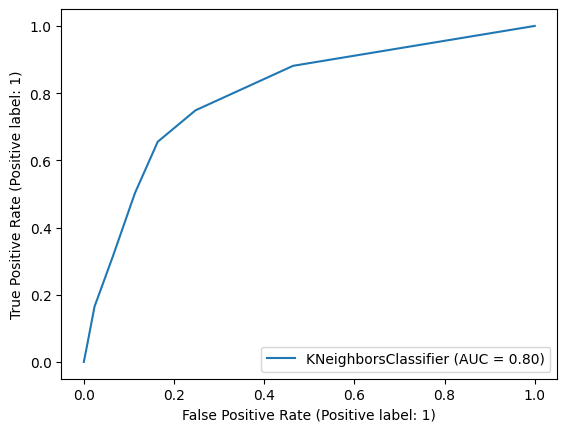

In [184]:
# Построим ROC-кривую на тестовой выборке
RocCurveDisplay.from_estimator(knn2, features_test, target_test)
plt.show()
plt.close()

In [185]:
# Оценим вероятности на тестовой выборке
knn2_prob1 = knn2.predict_proba(features_test)[:, 1]
nb_prob1   = nb_train.predict_proba(features_nb_test)[:, 1]
rf2_prob1  = rf2.predict_proba(features_test)[:, 1]

In [186]:
# Посчитеаем TPR и FPR при различных порога (thresholds)
knn2_FPR, knn2_TPR, knn2_thresholds = metrics.roc_curve(target_test, knn2_prob1)
nb_FPR, nb_TPR, nb_thresholds       = metrics.roc_curve(target_test, nb_prob1)
rf2_FPR, rf2_TPR, rf_thresholds    = metrics.roc_curve(target_test, rf2_prob1)

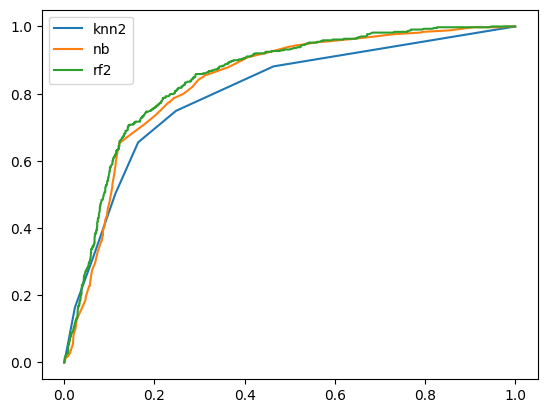

In [187]:
# Построим ROC-кривые сразу для трех моделей
plt.plot(knn2_FPR, knn2_TPR, label = "knn2")
plt.plot(nb_FPR, nb_TPR, label = "nb")
plt.plot(rf2_FPR, rf2_TPR, label = "rf2")
plt.legend()
plt.show()

In [188]:
# Сравним модели по AUC
knn2_AUC = metrics.roc_auc_score(target_test, knn2_prob1)
nb_AUC = metrics.roc_auc_score(target_test, nb_prob1)
rf2_AUC = metrics.roc_auc_score(target_test, rf2_prob1)
print(pd.DataFrame(data    = [rf2_AUC, knn2_AUC, nb_AUC],
                   index   = ['rf2', 'knn2', 'nb'],
                   columns = ['AUC']))

           AUC
rf2   0.848529
knn2  0.800213
nb    0.834546


Лучшая с точки зрения AUC модель - случайный лес.

##**6. Постройте матрицу путаницы и предположите цены различных видов прогнозов.**
Исходя из критерия максимизации прибыли на обучающей выборке подберите оптимальный порог прогнозирования для каждого из методов и сравните прибыли на тестовой выборке при соответствующих порогах. Результат представьте в форме таблицы, в которой должны быть указаны как AUC, так и прибыли (на тестовой выборке). Проинтерпретируйте полученный результат.

Рассчитаем цены прогнозов, отталкиваясь от состояния здоровья потенциальных матерей:

*   $p_{TP} = 10$, поскольку нам важно правильно определить курящую женщину. В таком случае, например, врачи сделают вывод о том, что ее здоровье может быть не очень хорошо для вынашивания ребенка и пропишут ей витамины/положат на сохранение, в общем, предпримут какие-то мероприятия, чтобы проследить за ее беременностью.
*   $p_{TN} = 4$, поскольку правильно угадывать некурящих для нас тоже хорошо. Тогда мы не потратим лишние ресурсы на поддержание здоровья и так здоровой женщины.
*   $p_{FP} = 1$. Мы предполагаем, что восприятие некурящей как курящей плохо с точки зрения использования ресурсов, так как можно было их не тратить, поэтому величина меньше, чем цена TN прогноза. Однако, для беременной женщины получить лишнее внимание врачей может быть и хорошо, поэтому эту величину мы оставили положительной.
*   $p_{FN} = -5$, поскольку для нас очень плохо "пропустить" курящую мать и принять ее за некурящую. В таком случае она может недополучить медицинское вмешательство и, как итог, беременность может пройти с осложнениями.



In [189]:
prices = pd.Series([10, 4, 1, -5], index = ["TP", "TN", "FP", "FN"])

**Для Байесовского:**

In [190]:
# Получим прогнозы на тестовой выборке с помощью модели
# с подобранными значениями гиперпараметров
prediction_test_nb = nb_train.predict(features_nb_test)

# Рассмотрим прогнозы различного вида
  # автоматически
TN_nb, FP_nb, FN_nb, TP_nb = confusion_matrix(target_test, prediction_test_nb).ravel()

predictions_nb = pd.Series([TP_nb, TN_nb, FP_nb, FN_nb],
                           index = ["TP", "TN", "FP", "FN"])
print(predictions_nb)

TP     201
TN    1411
FP     151
FN     237
dtype: int64


In [191]:
profit_nb = np.sum(prices * predictions_nb)
print(profit_nb)

6620


In [192]:
# Оценим условные вероятности на обучающей выборке
prob_nb_train = nb_train.predict_proba(features_nb_train)[:, 1]

# Возможные значения порогов
thresholds_nb = np.unique(np.sort(prob_nb_train))

In [193]:
# Число порогов
n_threshold_nb = thresholds_nb.size

# Вектор для сохранения прибылей при различных порогах
profits_nb = np.zeros(n_threshold_nb)

# Векторы различных видов прогнозов
TP_vec = np.zeros(n_threshold_nb)
TN_vec = np.zeros(n_threshold_nb)
FP_vec = np.zeros(n_threshold_nb)
FN_vec = np.zeros(n_threshold_nb)

In [194]:
# Рассчитаем прибыли для различных порогов
for i in range(0, n_threshold_nb):
  # получаем прогнозы (на обучающей выборке) при соответствующем пороге
  prediction_nb_i = (prob_nb_train >= thresholds_nb[i]).astype(int)
  # считаем количество прогнозов различного вида
  TN_vec[i], FP_vec[i], FN_vec[i], TP_vec[i] = confusion_matrix(
    target_train, prediction_nb_i).ravel()
  # аггрегируем результаты прогнозов
  predictions_nb_i = pd.Series([TP_vec[i], TN_vec[i], FP_vec[i], FN_vec[i]],
                                index = ["TP", "TN", "FP", "FN"])
  # считаем прибыль
  profits_nb[i] = np.sum(prices * predictions_nb_i)

In [195]:
# Сравним прибыли при различных порогах
nb_prof = pd.DataFrame({'profits': profits_nb, 'thresholds': thresholds_nb})
print(nb_prof)

     profits  thresholds
0    24461.0    0.034632
1    24575.0    0.037271
2    24701.0    0.037992
3    24818.0    0.039977
4    24971.0    0.040876
..       ...         ...
100  16547.0    0.830597
101  16550.0    0.850723
102  16259.0    0.862519
103  16100.0    0.868682
104  15773.0    0.871664

[105 rows x 2 columns]


In [100]:
# Достанем оптимальный порог
threshold_nb = thresholds_nb[np.argmax(profits_nb)]
print(threshold_nb)

0.11129621006590068


In [196]:
nb_prof[nb_prof['thresholds']==threshold_nb]

,profits,thresholds
28,33623.0,0.111296


In [197]:
pr_nb = nb_prof[nb_prof['thresholds']==threshold_nb]
best_profit_nb = pr_nb.loc[pr_nb['thresholds'] == threshold_nb, 'profits'].values[0]
best_profit_nb

33623.0

**Для kNN:**

In [198]:
# Получим прогнозы на тестовой выборке с помощью модели
# с подобранными значениями гиперпараметров
prediction_test_knn2 = knn2.predict(features_test)

# Рассмотрим прогнозы различного вида
  # автоматически
TN, FP, FN, TP = confusion_matrix(target_test, prediction_test_knn2).ravel()
  # вручную
#TP = np.sum((target_test == 1) & (prediction_test_knn2 == 1))
#TN = np.sum((target_test == 0) & (prediction_test_knn2 == 0))
#FP = np.sum((target_test == 0) & (prediction_test_knn2 == 1))
#FN = np.sum((target_test == 1) & (prediction_test_knn2 == 0))
  # сохраним результат
predictions_knn2 = pd.Series([TP, TN, FP, FN], index = ["TP", "TN", "FP", "FN"])
print(predictions_knn2)

TP     220
TN    1385
FP     177
FN     218
dtype: int64


In [199]:
profit_knn2 = np.sum(prices * predictions_knn2)
print(profit_knn2)

6827


In [200]:
# Оценим условные вероятности на обучающей выборке
prob_knn2_train = knn2.predict_proba(features_train)[:, 1]

# Возможные значения порогов
thresholds_knn2 = np.unique(np.sort(prob_knn2_train))

Прибыль прогноза при пороге $c_{t}$ рассчитывается следующим образом:

$$\text{Profit}(c_{i}) = p_{\text{TP}} \times \text{TP}(c_{i}) + p_{\text{TN}} \times \text{TN}(c_{i}) + p_{\text{FP}} \times \text{FP}(c_{i}) + p_{\text{FN}} \times \text{FN}(c_{i})$$

где $\text{TP}(c_{i})$, $\text{TP}(c_{i})$, $\text{TP}(c_{i})$, $\text{TP}(c_{i})$ отражают число прогнозов соответствующего вида при использовании порога $c_{i}$.

В векторе `profits_knn2` элемент `profits_knn2[i]` отражает величину $\text{Profit}(c_{i})$.

In [201]:
# Число порогов
n_threshold_knn2 = thresholds_knn2.size

# Вектор для сохранения прибылей при различных порогах
profits_knn2 = np.zeros(n_threshold_knn2)

# Векторы различных видов прогнозов
TP_vec = np.zeros(n_threshold_knn2)
TN_vec = np.zeros(n_threshold_knn2)
FP_vec = np.zeros(n_threshold_knn2)
FN_vec = np.zeros(n_threshold_knn2)

In [202]:
# Рассчитаем прибыли для различных порогов
for i in range(0, n_threshold_knn2):
  # получаем прогнозы (на обучающей выборке) при соответствующем пороге
  prediction_knn_i = (prob_knn2_train >= thresholds_knn2[i]).astype(int)
  # считаем количество прогнозов различного вида
  TN_vec[i], FP_vec[i], FN_vec[i], TP_vec[i] = confusion_matrix(
    target_train, prediction_knn_i).ravel()
  # аггрегируем результаты прогнозов
  predictions_knn_i = pd.Series([TP_vec[i], TN_vec[i], FP_vec[i], FN_vec[i]],
                                index = ["TP", "TN", "FP", "FN"])
  # считаем прибыль
  profits_knn2[i] = np.sum(prices * predictions_knn_i)

In [203]:
# Сравним прибыли при различных порогах
print(pd.DataFrame({'profits': profits_knn2, 'thresholds': thresholds_knn2}))

   profits  thresholds
0  24461.0    0.000000
1  35108.0    0.142857
2  35768.0    0.285714
3  34379.0    0.428571
4  31577.0    0.571429
5  26399.0    0.714286
6  20978.0    0.857143
7  17384.0    1.000000


In [204]:
# Достанем оптимальный порог
threshold_knn2 = thresholds_knn2[np.argmax(profits_knn2)]
print(threshold_knn2)

0.2857142857142857


In [205]:
best_profit_knn = 35768

**Для случайного леса:**

In [206]:
# Получим прогнозы на тестовой выборке с помощью модели
# с подобранными значениями гиперпараметров
prediction_test_rf2 = rf2.predict(features_test)

# Рассмотрим прогнозы различного вида
  # автоматически
TN_rf, FP_rf, FN_rf, TP_rf = confusion_matrix(target_test, prediction_test_rf2).ravel()

predictions_rf2 = pd.Series([TP_rf, TN_rf, FP_rf, FN_rf], index = ["TP", "TN", "FP", "FN"])
print(predictions_rf2)

TP     280
TN    1373
FP     189
FN     158
dtype: int64


In [207]:
profit_rf2 = np.sum(prices * predictions_rf2)
print(profit_rf2)

7691


In [208]:
# Оценим условные вероятности на обучающей выборке
prob_rf2_train = rf2.predict_proba(features_train)[:, 1]

# Возможные значения порогов
thresholds_rf2 = np.unique(np.sort(prob_rf2_train))

In [209]:
# Число порогов
n_threshold_rf2 = thresholds_rf2.size

# Вектор для сохранения прибылей при различных порогах
profits_rf2 = np.zeros(n_threshold_rf2)

# Векторы различных видов прогнозов
TP_vec = np.zeros(n_threshold_rf2)
TN_vec = np.zeros(n_threshold_rf2)
FP_vec = np.zeros(n_threshold_rf2)
FN_vec = np.zeros(n_threshold_rf2)

In [210]:
# Рассчитаем прибыли для различных порогов
for i in range(0, n_threshold_rf2):
  # получаем прогнозы (на обучающей выборке) при соответствующем пороге
  prediction_rf_i = (prob_rf2_train >= thresholds_rf2[i]).astype(int)
  # считаем количество прогнозов различного вида
  TN_vec[i], FP_vec[i], FN_vec[i], TP_vec[i] = confusion_matrix(
    target_train, prediction_rf_i).ravel()
  # аггрегируем результаты прогнозов
  predictions_rf_i = pd.Series([TP_vec[i], TN_vec[i], FP_vec[i], FN_vec[i]],
                                index = ["TP", "TN", "FP", "FN"])
  # считаем прибыль
  profits_rf2[i] = np.sum(prices * predictions_rf_i)

In [211]:
# Сравним прибыли при различных порогах
rf_prof = pd.DataFrame({'profits': profits_rf2, 'thresholds': thresholds_rf2})

In [212]:
# Достанем оптимальный порог
threshold_rf2 = thresholds_rf2[np.argmax(profits_rf2)]
print(threshold_rf2)

0.1738901001077583


In [213]:
rf_prof[rf_prof['thresholds']==threshold_rf2]

,profits,thresholds
1118,34313.0,0.17389


In [214]:
pr_rf = rf_prof[rf_prof['thresholds']==threshold_rf2]
best_profit_rf = pr_rf.loc[pr_rf['thresholds'] == threshold_rf2, 'profits'].values[0]
best_profit_rf

34313.0

In [215]:
auc = [nb_AUC,knn2_AUC,rf2_AUC]
profit = [best_profit_nb,best_profit_knn,best_profit_rf]

In [216]:
results = pd.DataFrame(data    = [auc, profit],
                   index   = ['AUC','best_profit'],
                   columns = ['NB', 'kNN', 'RF'])
results.T

,AUC,best_profit
NB,0.834546,33623.0
kNN,0.800213,35768.0
RF,0.848529,34313.0


Заметим, что по AUC лучще всего случайный лес, а по значению прибыли оптимальным оказался метод ближайших соседей.

##**7. Опишите предполагаемые связи между переменными в форме ориентированного ациклического графа (DAG).**
Обучите структуру Байесовской сети на обучающей выборке и сравните точность прогнозов вашего и обученного DAG на тестовой выборке.


In [217]:
# Визуализируем предполагаемые связи

# Стиль отображения графика
nx_options = {
    'with_labels': True,
    'node_size': 1000,
    'node_color': 'lightblue',
    'font_size': 10,
    'font_weight': 'bold',
    'arrowsize': 20,
}


# Связи
edges = [                       # (откуда стрелочка, куда стрелочка)
    ('married', 'smoking'),
    ('full_term', 'smoking'),
    ('income_bin', 'smoking'),
    ('age_bin', 'smoking'),
    ('smoking_friends', 'smoking')
]
DAG = bnlearn.make_DAG(edges)

[bnlearn] >bayes DAG created.


In [218]:
df_bn = df.loc[:, df.columns.drop(['age', 'income'])]
df_bn.head(10).style.format(precision = 2)

,weight,smoking,married,full_term,smoking_friends,genes,income_bin,age_bin
0,3773.59,0,1,1,1,62.00,2,0
1,1989.78,1,1,1,1,87.00,1,3
2,3251.92,0,1,1,1,43.00,2,2
3,1840.81,0,1,1,0,68.00,0,0
4,4428.10,0,1,1,1,90.00,3,1
5,2038.12,0,1,1,0,73.00,0,3
6,2003.14,1,0,1,0,81.00,2,0
7,2962.41,0,1,0,1,84.00,1,1
8,2068.87,0,1,0,0,55.00,0,3
9,5676.02,0,1,1,1,64.00,3,0


In [219]:
# Оценим факторы
bn = bnlearn.parameter_learning.fit(DAG, df_bn, methodtype = 'ml')

[bnlearn] >Removing columns from dataframe to make consistent with DAG [['weight' 'genes']]
[bnlearn] >Parameter learning> Computing parameters using [ml]
[bnlearn] >CPD of married:
+------------+--------+
| married(0) | 0.2447 |
+------------+--------+
| married(1) | 0.7553 |
+------------+--------+
[bnlearn] >CPD of smoking:
+-----------------+--------------------+-----+--------------------+----------------------+
| age_bin         | age_bin(0)         | ... | age_bin(3)         | age_bin(3)           |
+-----------------+--------------------+-----+--------------------+----------------------+
| full_term       | full_term(0)       | ... | full_term(1)       | full_term(1)         |
+-----------------+--------------------+-----+--------------------+----------------------+
| income_bin      | income_bin(0)      | ... | income_bin(3)      | income_bin(3)        |
+-----------------+--------------------+-----+--------------------+----------------------+
| married         | married(0)    

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


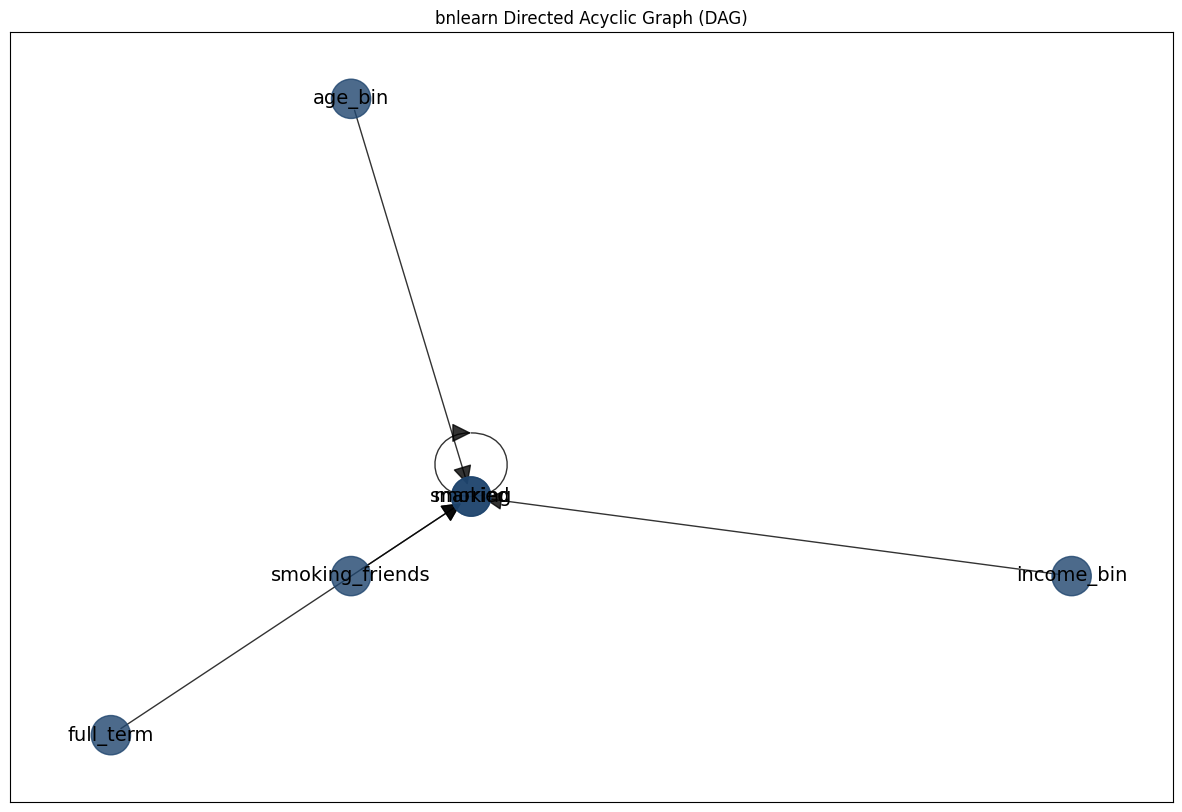

In [220]:
# Визуализируем DAG
bnlearn.plot(bn, interactive = False)
plt.show()

In [222]:
# Оценим условные вероятности курения
predict_bn = bnlearn.predict(bn, df = features_nb, variables = ["smoking"])

[bnlearn]> Remaining columns for inference: 5


100%|██████████| 106/106 [00:00<00:00, 540.14it/s]


In [223]:
# Достанем прогнозы
prediction_bn = predict_bn.loc[:, "smoking"]

# Достанем оценки условных вероятностей smoking
# с учетом того, что изначально мы имеем лишь вероятности
# наиболее вероятных категорий
prob_nb = np.zeros(len(predict_bn.loc[:, "p"]))
prob_nb[prediction_bn == 0] = 1 - predict_bn.loc[prediction_bn == 0, "p"]
prob_nb[prediction_bn == 1] = predict_bn.loc[prediction_bn == 1, "p"]

In [224]:
# Оценим точность на обучающей выборке
ACC_bn = np.mean(target == prediction_bn)

# Сравнение точностей на обучающей выборке
print(pd.DataFrame(data    = [ACC_bn],
                   index   = ['Байесовская сеть'],
                   columns = ['ACC']))

                     ACC
Байесовская сеть  0.8364


**Проверка точности Байесовской сети на тестовой выборке**

**Цели** ⭐

*   Разбить выборку на обучающую и тестовую.
*   Обучить байесовскую сеть на обучающей выборке.
*   Спрогнозировать вероятность курения на тестовой выборке, используя байесовскую сеть, обученную на обучающей выборке.
*   Оценить точность прогнозов $\text{ACC}$ байесовской сети на тестовой выборке.

In [225]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.2, random_state = 777)

In [226]:
# Поскольку для обучения Байесовской сети нужно подавать сразу все
# данные, без разбиения на признаки и целевую переменную, агрегируем
# их в единный датафрейм
df_train = features_nb_train.copy()
df_train["smoking"] = target_train
df_train.head(5)

,married,full_term,smoking_friends,income_bin,age_bin,smoking
8490,1,1,1,2,1,0
9788,1,1,1,1,2,0
5967,1,0,1,3,0,0
7519,1,1,1,3,3,0
8614,1,1,1,2,0,0


In [227]:
# Оценим параметры модели на обучающей выборке
bn_train = bnlearn.parameter_learning.fit(DAG, df_train, methodtype = 'ml')

[datazets] >WARNING> Replacing existing CPD for married
[datazets] >WARNING> Replacing existing CPD for smoking
[datazets] >WARNING> Replacing existing CPD for full_term
[datazets] >WARNING> Replacing existing CPD for income_bin
[datazets] >WARNING> Replacing existing CPD for age_bin
[datazets] >WARNING> Replacing existing CPD for smoking_friends


[bnlearn] >Parameter learning> Computing parameters using [ml]
[bnlearn] >CPD of married:
+------------+---------+
| married(0) | 0.24625 |
+------------+---------+
| married(1) | 0.75375 |
+------------+---------+
[bnlearn] >CPD of smoking:
+-----------------+--------------------+-----+--------------------+----------------------+
| age_bin         | age_bin(0)         | ... | age_bin(3)         | age_bin(3)           |
+-----------------+--------------------+-----+--------------------+----------------------+
| full_term       | full_term(0)       | ... | full_term(1)       | full_term(1)         |
+-----------------+--------------------+-----+--------------------+----------------------+
| income_bin      | income_bin(0)      | ... | income_bin(3)      | income_bin(3)        |
+-----------------+--------------------+-----+--------------------+----------------------+
| married         | married(0)         | ... | married(1)         | married(1)           |
+-----------------+-----------

In [228]:
# Получим прогнозы по тестовой выборке
predict_bn_test = bnlearn.predict(bn, df = features_nb_test,
                                     variables = ["smoking"])
prediction_bn_test = np.array(predict_bn_test.loc[:, "smoking"])

[bnlearn]> Remaining columns for inference: 5


100%|██████████| 95/95 [00:00<00:00, 559.70it/s]


In [229]:
# Оценим точность прогноза по тестовой выборке и сравним
# с внутривыборочным прогнозом
ACC_bn_test = np.mean(target_test == prediction_bn_test)

# Сравнение точностей на обучающей и тестовой выборках
print(pd.DataFrame(data    = [ACC_bn, ACC_bn_test],
                   index   = ['Обучающая выборка',
                              'Тестовая выборка'],
                   columns = ['ACC']))

                      ACC
Обучающая выборка  0.8364
Тестовая выборка   0.8275


**Обучение структуры Байесовской сети** 🐱

**Цели** ⭐

*   Подобрать оптимальный DAG.
*   Оценить байесовскую сеть с подобранным оптимальным DAG.
*   Сравнить точность прогнозов $\text{ACC}$ исходной байесовской сети (с DAG, сформированных исходя из теоретических соображений) и новой (с оптимальным DAG).

In [230]:
# Подберем оптимальную структуру DAG на обучающей выборе
bn2_train_structure = bnlearn.structure_learning.fit(df_train,
                                                     methodtype = 'hc',
                                                     scoretype  = 'aic')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [aic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


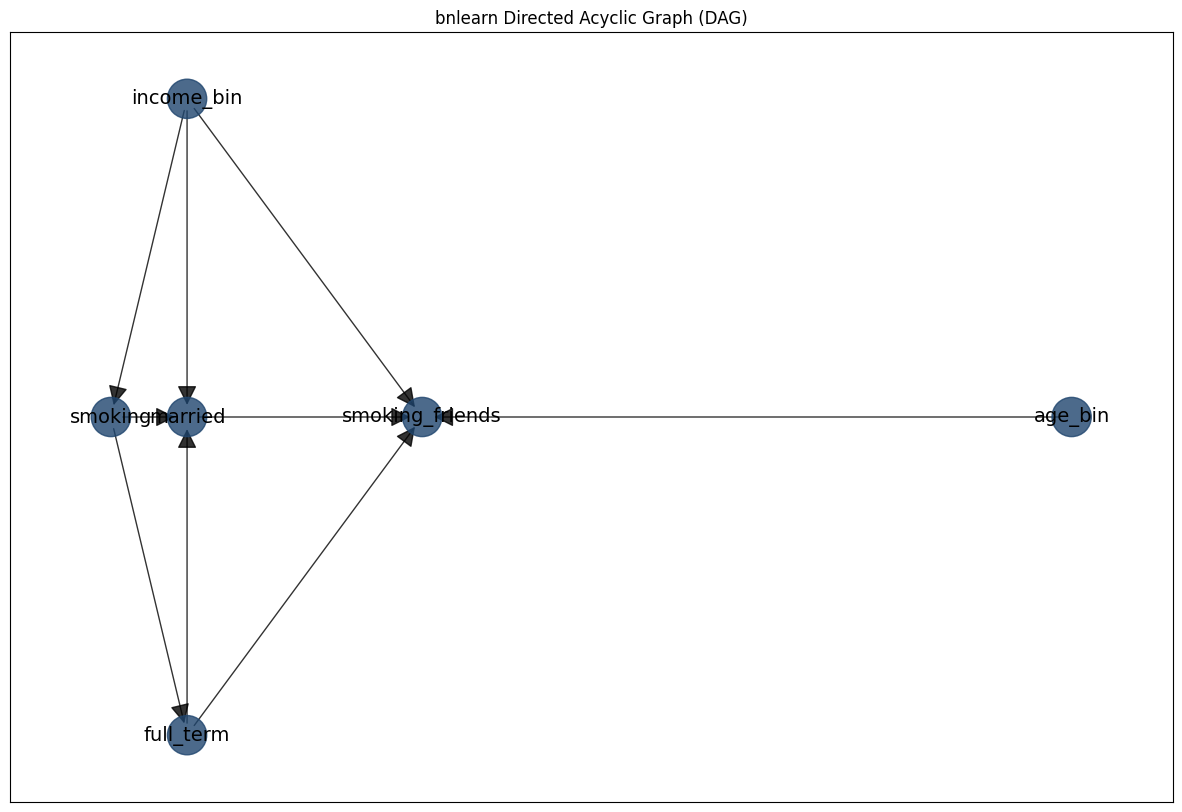

In [231]:
# Посмотрим на результат
bnlearn.plot(bn2_train_structure, interactive = False)
plt.show()

In [232]:
# Сохраним найденный DAG
DAG2 = bnlearn.make_DAG(bn2_train_structure)

[bnlearn] >No changes made to existing bayes DAG.


In [233]:
# Оценим модель с подобранным DAG
bn2_train = bnlearn.parameter_learning.fit(DAG2, df_train,
                                           methodtype = 'ml')

[bnlearn] >Parameter learning> Computing parameters using [ml]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of married:
+------------+---------------------+-----+---------------------+---------------------+
| full_term  | full_term(0)        | ... | full_term(1)        | full_term(1)        |
+------------+---------------------+-----+---------------------+---------------------+
| income_bin | income_bin(0)       | ... | income_bin(3)       | income_bin(3)       |
+------------+---------------------+-----+---------------------+---------------------+
| smoking    | smoking(0)          | ... | smoking(0)          | smoking(1)          |
+------------+---------------------+-----+---------------------+---------------------+
| married(0) | 0.10897435897435898 | ... | 0.10041551246537396 | 0.9623287671232876  |
+------------+---------------------+-----+---------------------+---------------------+

In [234]:
# Получим прогнозы по тестовой выборке
predict_bn2_test = bnlearn.predict(bn2_train, df = features_nb_test,
                                   variables = ["smoking"])
prediction_bn2_test = np.array(predict_bn2_test.loc[:, "smoking"])

[bnlearn]> Remaining columns for inference: 5


100%|██████████| 95/95 [00:00<00:00, 502.25it/s]


In [235]:
# Оценим точность прогноза по тестовой выборке
ACC_bn2_test = np.mean(target_test == prediction_bn2_test)

# Сравним точность Байесовской сети с
# исходным и обученным DAG
print(pd.DataFrame(data    = [ACC_bn_test, ACC_bn2_test],
                   index   = ['Байесовская сеть с исходным DAG',
                              'Байесовская сеть с обученным DAG'],
                   columns = ['ACC-test']))

                                  ACC-test
Байесовская сеть с исходным DAG     0.8275
Байесовская сеть с обученным DAG    0.8300


Выберем лучший и худший классификатор по точности на тесте:

In [236]:
res1 = res['Test_ACC_tuned']
res1['BN'] = ACC_bn2_test
res1['NB'] = ACC_nb_test #так как в наивной баесовском не подбирали
#гиперпараметры, заменим на простую точность на тестовой выборке
res1

NB     0.806
kNN    0.802
RF     0.826
BN      0.83
Name: Test_ACC_tuned, dtype: object

Так как мы не считали прибыль и AUC для байесовской сети, то, среди всех, лучший классификатор - байесвоская сеть, худший - метод ближайших соседей. Однако, различия между байесовской сетью и случайным лесом невелики, тем более, по AUC случайный лес оказался оптимальным. Поэтому далее в пунктах, где нужен лучший классификатор, будем использовать случайный лес.

#4. Регрессии

##**1. Отберите признаки, которые могут быть полезны при прогнозировании целевой (зависимой) переменной.**
Не включайте в число этих признаков переменную воздействия.

In [238]:
df_reg = df.drop({'income_bin','age_bin','smoking','smoking_friends','genes'},
                 axis = 1)
df_reg

,weight,age,income,married,full_term
0,3773.587751,21.0,119.0,1,1
1,1989.784386,36.0,73.0,1,1
2,3251.918891,31.0,110.0,1,1
3,1840.805003,18.0,32.0,1,1
4,4428.097002,25.0,130.0,1,1
...,...,...,...,...,...
9995,2762.745666,25.0,80.0,1,1
9996,4676.651196,19.0,152.0,1,1
9997,1990.283154,26.0,96.0,0,1
9998,3533.840673,33.0,97.0,1,1


In [239]:
# Разделим целевую переменную и признаки
target_reg = df_reg.loc[:, ['weight']]                              # целевая переменная
features_reg = df_reg.loc[:, df_reg.columns.drop('weight')]  # матрица признаков
target_reg = np.squeeze(target_reg)                               # преобразуем из вектора столбца
                                                            # в одномерный массив

In [241]:
# Разделим выборку на обучающую и тестовую
features_reg_train, features_reg_test, target_reg_train,target_reg_test = train_test_split(
    features_reg, target_reg, test_size = 0.2, random_state = 123)

# Сохраним число наблюдений обучающей и тестовой выборок
n_train = len(target_reg_train)
n_test  = len(target_reg_test)

# Вернем исходную сортировку индексов
features_reg_train = features_reg_train.reset_index(drop = True)
target_reg_train   = target_reg_train.reset_index(drop = True)
features_reg_test  = features_reg_test.reset_index(drop = True)
target_reg_test    = target_reg_test.reset_index(drop = True)

##**2. Выберите произвольные значения гиперпараметров, а затем оцените и сравните (между методами) точность прогнозов с помощью RMSE и MAPE**:
* на обучающей и тестовой выборке.

In [242]:
def rmse(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    return rmse
def mape(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return mape

Начнем со случайного леса, для этого обучим случайное дерево.

In [243]:
# Обучим регрессионное дерево
rt = tree.DecisionTreeRegressor(max_depth = 10, criterion = 'squared_error')
rt.fit(features_reg_train, target_reg_train)

DecisionTreeRegressor(max_depth=10)

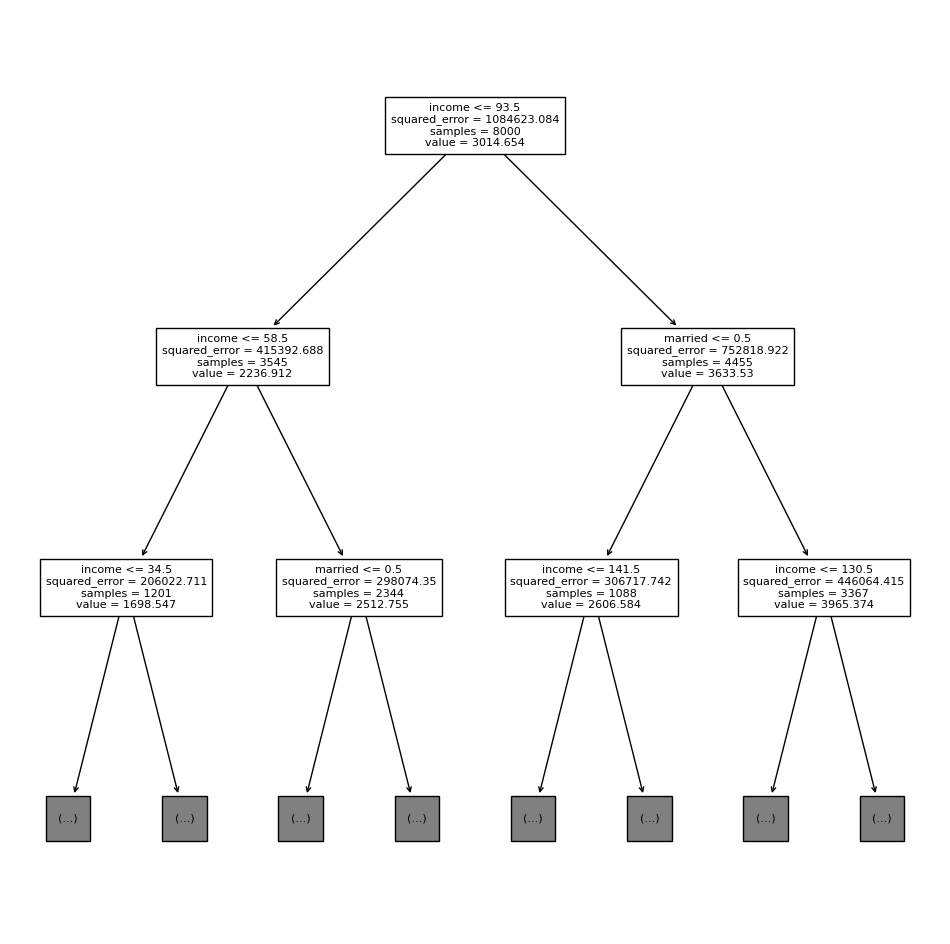

In [244]:
# Визуализируем полученный результат, для наглядности
# и быстроты ограничив максимальную глубину на картинке
plt.figure(figsize = (12, 12))
tree.plot_tree(rt, feature_names = features_reg_train.columns,
               fontsize = 8, max_depth = 2)
plt.show()

In [245]:
# Обучим случайный лес из регрессионных деревьев
rfr = RandomForestRegressor(max_depth = 10,              # максимальная глубина деревьев
                            max_features = "sqrt",       # число случайно выбираемых на
                                                         # каждой итерации признаков
                            max_samples = 500,           # число бутстрап итераций
                            random_state = 777,          # для воспроизводимости
                            criterion = 'squared_error') # критерий выбора признаков
                                                         # при разбиении узлов
rfr.fit(features_reg_train, target_reg_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', max_samples=500,
                      random_state=777)

In [246]:
rfr_pred_train = rfr.predict(features_reg_train) #on train
rfr_pred_test = rfr.predict(features_reg_test) #on test

МНК:

In [247]:
# Оценим МНК регрессию
ls = LinearRegression()
ls.fit(features_reg_train, target_reg_train)

LinearRegression()

In [248]:
ls_pred_test  = ls.predict(features_reg_test)
ls_pred_train  = ls.predict(features_reg_train)

kNN:

In [249]:
knn_reg = KNeighborsRegressor(n_neighbors = 3,      # число соседей
                           metric = "minkowski", # метрика расстояния
                           p = 2)                # Евклидова метрика
knn_reg.fit(features_reg_train, target_reg_train)
knn_reg_pred_test = knn_reg.predict(features_reg_test)
knn_reg_pred_train = knn_reg.predict(features_reg_train)

In [250]:
#ls
rmse_ls_test = rmse(target_reg_test,ls_pred_test)
rmse_ls_train = rmse(target_reg_train,ls_pred_train)
mape_ls_test = mape(target_reg_test,ls_pred_test)
mape_ls_train = mape(target_reg_train,ls_pred_train)
#rfr
rmse_rfr_test = rmse(target_reg_test,rfr_pred_test)
rmse_rfr_train = rmse(target_reg_train,rfr_pred_train)
mape_rfr_test = mape(target_reg_test,rfr_pred_test)
mape_rfr_train = mape(target_reg_train,rfr_pred_train)
#knn
rmse_knn_reg_test = rmse(target_reg_test,knn_reg_pred_test)
rmse_knn_reg_train = rmse(target_reg_train,knn_reg_pred_train)
mape_knn_reg_test = mape(target_reg_test,knn_reg_pred_test)
mape_knn_reg_train = mape(target_reg_train,knn_reg_pred_train)

На кросс-валидации с произвольными параметрами:

In [251]:
# Функция для оценки кросс-валидации
def cross_val_rmse(model, X, y, cv=5):
    rmse_scores = -cross_val_score(model, X, y,
                                   scoring='neg_root_mean_squared_error', cv=cv)
    return rmse_scores.mean()

def cross_val_mape(model, X, y, cv=5):
    mape_scores = -cross_val_score(model, X, y,
                         scoring='neg_mean_absolute_percentage_error', cv=cv)
    return  mape_scores.mean()

In [252]:
#rfr
mape_rfr_CV = cross_val_mape(rfr,features_reg_train,target_reg_train)
rmse_rfr_CV = cross_val_rmse(rfr,features_reg_train,target_reg_train)
#ls
mape_ls_CV = cross_val_mape(ls,features_reg_train,target_reg_train)
rmse_ls_CV = cross_val_rmse(ls,features_reg_train,target_reg_train)
#knn
mape_knn_reg_CV = cross_val_mape(knn_reg,features_reg_train,target_reg_train)
rmse_knn_reg_CV = cross_val_rmse(knn_reg,features_reg_train,target_reg_train)

In [253]:
LS = [mape_ls_test,rmse_ls_test,mape_ls_train,rmse_ls_train,
      mape_ls_CV,rmse_ls_CV]
kNN_reg = [mape_knn_reg_test,rmse_knn_reg_test,mape_knn_reg_train,
           rmse_knn_reg_train,mape_knn_reg_CV,rmse_knn_reg_CV]
RFR = [mape_rfr_test,rmse_rfr_test,mape_rfr_train,rmse_rfr_train,
       mape_rfr_CV,rmse_rfr_CV]

Сгруппируем промежуточные результаты в таблицу:

In [254]:
res_reg1 = pd.DataFrame(data    = [LS,kNN_reg,RFR],
                   index   = ['LS','knn_reg','RFR'],
                   columns = ['MAPE_test',
                              'RMSE_test','MAPE_train','RMSE_train',
                              'MAPE_CV','RMSE_CV'])
print(res_reg1.T)

                    LS     knn_reg         RFR
MAPE_test     0.109321    0.150118    0.093416
RMSE_test   351.351428  521.261327  289.637501
MAPE_train    0.109715    0.100115    0.090215
RMSE_train  351.154860  357.818929  285.015862
MAPE_CV       0.109820    0.150703    0.094900
RMSE_CV     351.475978  528.140155  298.460779


На кросс-валидации лучшим оказался случайный лес, так же как и на тестовой выборке.

##**3. Для каждого метода с помощью кросс-валидации на обучающей выборке подберите оптимальные значения гиперпараметров (тюнинг).**
В качестве критерия качества используйте RMSE. Результат представьте в форме таблицы, в которой для каждого метода должны быть указаны:
* изначальные и подобранные значения гиперпараметров.
* кросс-валидационное значение RMSE на обучающей выборке с исходными
и подобранными значениями гиперпараметров.
* значение RMSE на тестовой выборке с исходными и подобранными значениями гиперпараметров.


In [255]:
# Перебираемые значения гиперпараметров
hyperparameters_knn_reg = {'n_neighbors': [3, 5, 7], 'p': [1, 2, 3]}

In [256]:
# Перебор гиперпараметров с помощью кросс-валидации
GSCV_knn_reg = GridSearchCV(estimator = knn_reg,               # модель
                        param_grid = hyperparameters_knn_reg,  # перебираемые гиперпараметры
                        scoring = 'neg_root_mean_squared_error',          # метрика качества модели
                        cv = 5)                        # число фолдов в кросс-валидации
GSCV_knn_reg.fit(features_reg_train, target_reg_train)             # подбор гиперпараметров
                                                       # на конкретных данных

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=3),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2, 3]},
             scoring='neg_root_mean_squared_error')

In [257]:
# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_knn_reg_best = GSCV_knn_reg.best_params_
print(hyperparameters_knn_reg_best)

{'n_neighbors': 5, 'p': 1}


In [258]:
# Обучим модель с лучшими гиперпараметрами
knn_reg_tuned = KNeighborsRegressor(n_neighbors = hyperparameters_knn_reg_best["n_neighbors"],
                            metric = "minkowski",
                            p = hyperparameters_knn_reg_best["p"])
knn_reg_tuned.fit(features_reg_train, target_reg_train)
prediction_knn_reg_tuned = knn_reg_tuned.predict(features_reg_test)

Случайный лес:

In [259]:
# Перебираемые значения гиперпараметров
hyperparameters_rfr = {'max_depth': range(0, 20),
                   'n_estimators': [50, 100, 150]}

# Перебор гиперпараметров с помощью кросс-валидации
GSCV_rfr = GridSearchCV(estimator = RandomForestRegressor(),
                       param_grid = hyperparameters_rfr,
                       scoring = "neg_root_mean_squared_error",
                       cv = 5)

GSCV_rfr.fit(features_reg_train, target_reg_train)

# Достанем гиперпараметры, соответствующие лучшей модели
hyperparameters_rfr_best = GSCV_rfr.best_params_


# Посмотрим на оптимальные гиперпараметры
print(hyperparameters_rfr_best)

{'max_depth': 7, 'n_estimators': 150}


In [260]:
# Обучим модель с лучшими параметрами
rfr_tuned = RandomForestRegressor(max_depth = hyperparameters_rfr_best["max_depth"],
                      n_estimators = hyperparameters_rfr_best["n_estimators"],
                                 criterion = 'squared_error')
rfr_tuned.fit(features_reg_train, target_reg_train)

RandomForestRegressor(max_depth=7, n_estimators=150)

In [261]:
prediction_rfr_tuned = rfr_tuned.predict(features_reg_test)

In [262]:
#rfr cv
rmse_rfr_CV_tuned = cross_val_rmse(rfr_tuned,features_reg_train,target_reg_train)

#knn cv
rmse_knn_reg_CV_tuned = cross_val_rmse(knn_reg_tuned,features_reg_train,target_reg_train)

In [263]:
#rfr
rmse_rfr_test_tuned = rmse(target_reg_test,prediction_rfr_tuned)
#knn
rmse_knn_reg_test_tuned = rmse(target_reg_test,prediction_knn_reg_tuned)

In [264]:
LS_res = ['-','-',rmse_ls_CV,'-',rmse_ls_test,'-']
KNN_res = ['(3;2)','(5;1)',rmse_knn_reg_CV,rmse_knn_reg_CV_tuned,
           rmse_knn_reg_test,rmse_knn_reg_test_tuned]
RFR_res = ['10','7',rmse_rfr_CV,rmse_rfr_CV_tuned,
           rmse_rfr_test,rmse_rfr_test_tuned]

In [265]:
res_reg = pd.DataFrame(data    = [LS_res,KNN_res,RFR_res],
                   index   = ['LS','knn_reg','RFR'],
                   columns = ['params',
                              'params_tuned','RMSE_CV',
                              'RMSE_CV_tuned','RMSE_test','RMSE_test_tuned'])
print(res_reg.T)

                         LS     knn_reg         RFR
params                    -       (3;2)          10
params_tuned              -       (5;1)           7
RMSE_CV          351.475978  528.140155  298.460779
RMSE_CV_tuned             -  495.058377  296.740765
RMSE_test        351.351428  521.261327  289.637501
RMSE_test_tuned           -  501.146353  288.875541


Далее нам нужно будет использовать результаты лушших и худших классификаторов и регрессионных моделей. Освежим в памяти: лучший классификатор - случайный, лучшая регрессионная модель -  тоже случайный лес. Худший классификатор - метод ближайших соседей, худшая регрессионная модель - тоже метод ближайших соседей.

#5. Эффекты воздействия

##**1. Математически запишите и содержательно проинтерпретируйте потенциальные исходы целевой переменной. Объясните, как они связаны с наблюдаемыми значениями целевой переменной.**

Математическая запись для потенциальных исходов weight0 и weight1 представлена разделе "Генерация и предварительная обработка данных" в пункте "Генерация целевой переменной", для наглядности мы перенесли уравнения и сюда, где weight0 - потенциальный вес ребенка, когда его мать не курит, а weight1 - вес новорожденного в случае курения матери.

Уравнение веса младенца при отсутствии курения матери:

$$\text{Weight}_{0i} = \underbrace{\underbrace{150 + 15\times\text{Genes}_{i}}_{g_{0}^{\text{unobs}}} + \underbrace{70\times\frac{\text{Income}_{i}}{5 - \text{Married}_{i} - \text{Full_term}_{i}}-30\times ln({Age}_{i})}_{g_{0}^{\text{obs}}}}_{g_{0}} + \varepsilon_{0i}\text{, где }\varepsilon_{0i}\sim \left(8\times t(15)\right)$$


Уравнение веса младенца при курении матери:

$$\text{Weight}_{1i} = \underbrace{\underbrace{11\times \text{Genes}_{i}}_{g_{1}^{\text{unobs}}} + \underbrace{50\times \frac{\text{Income}_{i}}{5 - \text{Married}_{i} - \text{Full_term}_{i}}-50\times ln({Age}_{i})}_{g_{1}^{\text{obs}}}}_{g_{1}} + \varepsilon_{1i}\text{, где }\varepsilon_{1i}\sim \left(\text{EXP}(0.1) - 10\right)$$

Интерпретация: вес ребенка некурящей матери отличается как минимум на константу - он весит заведомо на 150 грамм больше. Также, здоровый образ жизни в виде отказа от курения повышает отдачу от генетических факторов и дохода семьи, что видно в бОльших коэффициентах при этих переменных.

Наблюдаемый вес новорожденного:

$$\text{Weight}_{i} = \begin{cases}\text{Weight}_{1i}\text{, если }\text{Smoking}_{i}=1\\ \text{Weight}_{0i}\text{, если }\text{Smoking}_{i}=0\end{cases} = \\ =\text{Weight}_{1i}\times\text{Smoking}_{i} + \text{Weight}_{0i}\times\left(1-\text{Smoking}_{i}\right)$$

##**2. Используя симулированные вами, но недоступные в реальных данных потенциальные исходы (гипотетические значения), получите оценки среднего эффекта воздействия, условных средних эффектов воздействия и локального среднего эффекта воздействия.**
Результаты представьте в форме таблицы.
Примечание: для получения очень точных оценок эффектов воздействия с
помощью потенциальных исходов (гипотетических переменных) можно сперва
симулировать очень большого число наблюдений, например, несколько миллионов. Затем, для ускорения вычислений, для оценивания эффектов воздействия
с помощью наблюдемых значений можно использовать часть выборки, например, десять тысяч наблюдений.

Эффект воздействия:

$$\text{TE}_{i} = \text{Weight}_{1i} - \text{Weight}_{0i}$$

In [266]:
# Настоящие эффекты воздействия (не наблюдаются в данных)
TE = weight1 - weight0
print(TE[0:10])

[-1269.09255512 -1057.26725548 -1115.82441937  -680.39565507
 -1440.64236122  -775.33338661 -1031.88371508 -1010.13343807
  -793.61909957 -1799.95695834]


Средний эффект воздействия:

$$\text{ATE} = \text{E}\left(\text{Weight}_{1i} - \text{Weight}_{0i}\right)$$

Если бы у нас были данные о $\text{Weight}_{1i}$ и $\text{Weight}_{0i}$, то мы могли бы очень точно оценить $\text{ATE}$ как:

$$\widehat{\text{ATE}} = \frac{1}{n}\sum\limits_{i=1}^{n}\text{Weight}_{1i} - \text{Weight}_{0i}$$

In [267]:
# Точное приближение среднего эффекта воздействия, то есть
# с помощью оценки, недоступной с помощью реальных данных
ATE = np.mean(TE)
print(ATE)

-1108.9850705768824


Локальный средний эффект воздействия:

$$\text{LATE} = \text{E}(\text{Weight}_{1i} - \text{Weight}_{0i} | \text{Smoking}_{1i} > \text{Smoking}_{0i})$$

In [268]:
# Точное приближение локального среднего эффекта воздействия, то есть
# с помощью оценки, недоступной с помощью реальных данных
LATE = np.mean(TE[ind_type == "Complier"])
print(LATE)

-978.5987700686053


Условный средний эффект воздействия:

$$\text{CATE}_{i} = \text{E}\left(\text{Weight}_{1i}|X_{i}\right) - \text{E}\left(\text{Weight}_{0i}|X_{i}\right) = g_{1}(X_{i}) - g_{0}(X_{i})$$

In [269]:
# Значения локальных средних эффектов воздействия
CATE = np.mean(g1 - g0)
print(CATE)

-1109.1591908942323


Таблица с результатами

In [270]:
res_eff = pd.DataFrame(data    = [ATE,LATE,CATE],
                   index   = ['ATE','LATE','CATE'],
                   columns = ['Значения'])
print(res_eff.T)

                  ATE       LATE         CATE
Значения -1108.985071 -978.59877 -1109.159191


##**3. Оцените средний эффект воздействия как разницу в средних по выборкам тех,кто получил и не получил воздействие.**
Опишите недостатки соответствующего подхода с учетом специфики рассматриваемой вами экономической проблемы. Примечание: в этом пункте и далее, если не сказано иное, используются лишь наблюдаемые значения целевой переменной.

Допущение о независимости:

$$\text{E}(\text{Weight}_{1i}|\text{Smoking}_{i}=1) = \text{E}(\text{Weight}_{1i})\qquad \text{E}(\text{Weight}_{0i}|\text{Smoking}_{i}=0) = \text{E}(\text{Weight}_{0i})$$

Попробуем оценить ATE наивным способом, опирающимся на допущение о независимости, которое не соблюдается в данном случае, поскольку контрольные переменные и ненаблюдаемая переменная генов одновременно связаны и с фактом курения матери $\text{Smoking}_{i}$, и с весом ребенка $\text{Weight}_{i}$. Это и является недостатком данного метода.

Наивный подход предполагает оценивание $\text{ATE}$ как средней разницы в весе новорожденных у  курящей матерей и некурящих.

$$\widehat{\text{ATE}}_{\text{naive}} = \frac{1}{n_{1}}\sum\limits_{i:\text{Smoking}_{i}=1}\text{Weight}_{1i} - \frac{1}{n_{0}}\sum\limits_{i:\text{Smoking}_{i}=0}\text{Weight}_{0i}$$

In [271]:
# Наивная оценка как разница в выборочных средних
ATE_naive = np.mean(weight[smoking == 1]) - np.mean(weight[smoking == 0])

# Сравнение точного приближения и наивной оценки
# когда у его родителей нет высшего образования и когда оно у них есть
print(pd.DataFrame(data    = [ATE, ATE_naive],
                   index   = ['Точная оценка с помощью потенциальных исходов',
                              'Наивная оценка с помощью наблюдаемых исходов'],
                   columns = ['ATE']))

                                                       ATE
Точная оценка с помощью потенциальных исходов -1108.985071
Наивная оценка с помощью наблюдаемых исходов  -1447.222040


##**4. Используя оценки, полученные лучшими из обученных ранее классификационных и регрессионных моделей, оцените средний эффект воздействия с помощью:**
* метода наименьших квадратов.
* условных математических ожиданий.
* взвешивания на обратные вероятности (в случае возникновения ошибок
убедитесь в отсутствии оценок вероятностей, равных 0 или 1 и при необходимости измените метод оценивания).
* метода, обладающего двойной устойчивостью.
* двойного машинного обучения.
Сравните результаты и назовите ключевую предпосылку этих методов. Содержательно обсудите причины, по которым она может соблюдаться или нарушаться в вашем случае. Приведите содержательную экономическую интерпретацию оценки среднего эффекта воздействия.

* **Метод наименьших квадратов**

Ослабим допущение о независимости до допущения об условной независимости:

$$\text{E}(\text{Weight}_{1i}|\text{Smoking}_{i}=1,X_{i}) = \text{E}(\text{Weight}_{1i}|X_{i})\qquad \text{E}(\text{Weight}_{0i}|\text{Smoking}_{i}=0,X_{i}) = \text{E}(\text{Weight}_{0i}|X_{i})$$

Попробуем оценить $\text{ATE}$ рассмотрев среднюю разницу в оценках разного веса, полученных с помощью МНК отдельно сперва по курящим матерям, а затем некурящим.

$$\widehat{\text{ATE}}_{\text{LS}} = \frac{1}{n}\sum\limits_{i=1}^{n} \underbrace{\hat{\text{E}}\left(\text{Weight}_{1i}|X_{i}\right) - \hat{\text{E}}\left(\text{Weight}_{0i}|X_{i}\right)}_{\widehat{\text{CATE}}_{i}}$$

Где:


*   $\hat{\text{E}}\left(\text{Weight}_{1i}|X_{i}\right)$ - оценка, полученная с использованием МНК оценок регрессионных коэффициентов $\beta$, полученных по выборке из курящих матерей $\text{Smoking}_{i} = 1$.
*   $\hat{\text{E}}\left(\text{Weight}_{0i}|X_{i}\right)$ - оценка, полученная с использованием МНК оценок регрессионных коэффициентов $\beta$, полученных по выборке из некурящих матерей $\text{Smoking}_{i} = 0$.




In [272]:
# Оценим средний эффект воздействия с помощью МНК
# МНК оценивание уравнения для некурящих матерей
y0 = df.loc[smoking == 0, ['weight']]
x0 = df.loc[smoking == 0, df.columns.drop(['weight','age_bin','income_bin', 'smoking_friends', 'smoking','genes'])]
x0 = sm.add_constant(x0)
ls0 = sm.OLS(y0, x0).fit()

# МНК оценивание уравнения курения для курящих
y1 = df.loc[smoking == 1, ['weight']]
x1 = df.loc[smoking == 1, df.columns.drop(['weight','age_bin','income_bin', 'smoking_friends', 'smoking','genes'])]
x1 = sm.add_constant(x1)
ls1 = sm.OLS(y1, x1).fit()

# Оценим вес новорожденных при наличии и отсутствия курения у матерей с помощью полученных МНК оценок
x = df.loc[:, df.columns.drop(['weight','age_bin','income_bin', 'smoking_friends', 'smoking','genes'])]
x = sm.add_constant(x)
  # МНК оценка E(weight0 | X) для всех женщин
weight0_ls = ls0.predict(x)
  # МНК оценка E(weight1 | X) для всех женщин
weight1_ls = ls1.predict(x)

# Оценки CATE
CATE_ls = np.array(weight1_ls - weight0_ls)

# Оценка ATE как средняя разница в прогнозах МНК оценок
ATE_ls = np.mean(CATE_ls)

In [273]:
# Сравним результаты
print(pd.DataFrame(data    = [ATE, ATE_naive, ATE_ls],
                   index   = ['ATE', 'ATE naive', "ATE ls"],
                   columns = ['Оценка']))

                Оценка
ATE       -1108.985071
ATE naive -1447.222040
ATE ls     -960.407584


* **Взвешивание на обратные вероятности**



In [275]:
# Оценивание с помощью обратного взвешивания на вероятности IPW
np.random.seed(123)
# Подготовка данных
target = df['weight']
features = df.loc[:, df.columns.drop(['weight','age_bin','income_bin', 'smoking', 'smoking_friends','genes'])]

# Подготовка метода машинного обучения для предсказания E(Y | X)
g_Y = RandomForestRegressor(n_estimators=150, max_depth=7)
g_Y.fit(features, target)
E_Y_given_X = g_Y.predict(features)

# Подготовка метода машинного обучения для предсказания P(T = 1 | X)
gb = RandomForestRegressor(n_estimators=150, max_depth=7)
gb.fit(features, df['smoking'])
P_T_given_X = gb.predict(features)

# Вычисление весов
weights = df['smoking'] / P_T_given_X + (1 - df['smoking']) / (1 - P_T_given_X)

# Вычисление псевдоисходов
pseudo_outcome = weights * (df['weight'] - E_Y_given_X)

# Оценка ATE с помощью линейной регрессии
reg = LinearRegression()
reg.fit(df[['smoking']], pseudo_outcome)
ATE_IPW = np.mean(reg.coef_[0])

print("ATE IPW:", ATE_IPW)

ATE IPW: -2204.5607284416105


* **Двойное машинное обучение**

In [276]:
#надо добавить ненаблюдаемую переменную, так как должна отсутствовать эндогенность
#для удобства также удалим переменные income_bin, age_bin
df1 = df.drop(['age_bin','income_bin','smoking_friends'],axis=1)
df1.head(3)

,weight,smoking,age,income,married,full_term,genes
0,3773.587751,0,21.0,119.0,1,1,62.0
1,1989.784386,1,36.0,73.0,1,1,87.0
2,3251.918891,0,31.0,110.0,1,1,43.0


In [277]:
# Данные в формате, необходимом для применения DML
dml_standard_data = dml.DoubleMLData(
    data = df1,
    y_col = 'weight',
    d_cols = 'smoking',
    x_cols = ['married', 'full_term', 'age', 'income','genes']
)

# Метод оценивания E(Y | X, T)
g_Y = RandomForestRegressor(n_estimators = 150,
                        # (7, 150) - подобранные гиперпараметры для регрессии
                            max_depth = 7,
                            max_features = 5)

# Метод оценивания E(T | X)
g_T = RandomForestClassifier(n_estimators = 50,
                      # (5, 50) - подобранные гиперпараметры для классификации
                             max_depth = 5,
                             max_features = 5)

# Подготовка объекта
dml_standard = dml.DoubleMLIRM(dml_standard_data, ml_g=g_Y, ml_m=g_T)

# Применение кросс-фиттинга
dml_standard.fit()

# Сохраним оценку
ATE_dml_standard = dml_standard.coef[0]

print(ATE_dml_standard)

-949.248814770186


In [278]:
print(dml_standard)

================== DoubleMLIRM Object ==================

------------------ Data summary      ------------------
Outcome variable: weight
Treatment variable(s): ['smoking']
Covariates: ['married', 'full_term', 'age', 'income', 'genes']
Instrument variable(s): None
No. Observations: 10000

------------------ Score & algorithm ------------------
Score function: ATE

------------------ Machine learner   ------------------
Learner ml_g: RandomForestRegressor(max_depth=7, max_features=5, n_estimators=150)
Learner ml_m: RandomForestClassifier(max_depth=5, max_features=5, n_estimators=50)
Out-of-sample Performance:
Learner ml_g0 RMSE: [[81.80623889]]
Learner ml_g1 RMSE: [[46.86634358]]
Learner ml_m RMSE: [[0.13498201]]

------------------ Resampling        ------------------
No. folds: 5
No. repeated sample splits: 1

------------------ Fit summary       ------------------
               coef   std err           t  P>|t|       2.5 %      97.5 %
smoking -949.248815  3.825143 -248.160368    0.

In [279]:
# Сопоставим результаты
print(pd.DataFrame(data    = [ATE, ATE_naive, ATE_ls, ATE_dml_standard],
                   index   = ['ATE', 'ATE naive', 'ATE ls', 'ATE dml standard'],
                   columns = ['Оценка']))


                       Оценка
ATE              -1108.985071
ATE naive        -1447.222040
ATE ls            -960.407584
ATE dml standard  -949.248815


* **метод, обладающий двойной устойсивостью**

In [280]:
y = df.loc[:, ['weight']]
x = df.loc[:, df.columns.drop(['weight', 'smoking_friends',
                               'age_bin','income_bin','genes'])]

rf_eff = RandomForestRegressor(n_estimators = 150,
                        # (7, 150) - подобранные гиперпараметры для регрессии
                            max_depth = 7,
                            max_features = 3)

rf_eff.fit(x, y)

# Оценки E(weight| X, smoking = 0) для всех индивидов,
# в том числе для тех, у кого smoking = 1.
x0 = deepcopy(x)
x0["smoking"] = 0
weight0_rf_eff = rf_eff.predict(x0)

# Оценки E(weight| X, smoking = 1) для всех индивидов,
# в том числе для тех, у кого smoking = 0.
x1 = deepcopy(x)
x1["smoking"] = 1
weight1_rf_eff = rf_eff.predict(x1)

In [281]:
# Оценим ATE с помощью DR метода с двойной устойчивостью
ATE_DR = np.mean((weight1_rf_eff - weight0_rf_eff) + \
                 smoking * (weight - weight1_rf_eff) / E_Y_given_X - \
                 (1 - weight) * (weight - weight0_rf_eff) / (1 - E_Y_given_X))

* метод условных математических ожиданий

In [282]:
# Оценки CATE
CATE_S = weight1_rf_eff - weight0_rf_eff

# Оценка ATE
ATE_S = np.mean(CATE_S)

Все полученные средние эффекты:

In [283]:
#  Сопоставим результаты
print(pd.DataFrame(data    = [ATE, ATE_naive, ATE_ls, ATE_dml_standard,
                              ATE_IPW, ATE_DR, ATE_S],
                   index   = ['ATE', 'ATE naive', 'ATE ls', 'ATE dml standard',
                              'ATE IPW', 'ATE DR', 'ATE S-learner'],
                   columns = ['Оценка']))

                       Оценка
ATE              -1108.985071
ATE naive        -1447.222040
ATE ls            -960.407584
ATE dml standard  -949.248815
ATE IPW          -2204.560728
ATE DR            -722.291718
ATE S-learner     -861.718140


* **Сравните результаты** и назовите ключевую предпосылку этих методов. Содержательно обсудите причины, по которым она может соблюдаться или нарушаться в вашем случае. Приведите содержательную экономическую интерпретацию оценки среднего эффекта воздействия

Основной предпосылкой тут является предпосылка об условной независимости. Она может не соблюдаться в случае наличия эндогенности, то есть, в случае пропуска переменной Genes. Обычно она соблюдается, когда в контрольных переменных отражены все факторы, которые могут влиять на переменную воздействия и на целевую переменную.
Посмотрим внимательно на полученные результаты: оценки всех методов получились отрицательными, что логически объяснимо, так как курение матери должно уменьшать вес новорожденного. В среднем по нашей выборке, факт курения матери уменьшает вес ребенка примерно на килограмм. Отметим, что оценка методом взвешивания на обратные вероятности кажется нам неправдоподобной, так как по ней разница в весе младенцев, рожденных курящими и некурящими женщинами, составляет около 2,2 кг. Однако, при среднем весе детей по выборке около 3 килограмм, такой результат нельзя назвать сопоставимым с реальностью.

* Оценка среднего эффекта воздействия (ATE)

 Предпосылки:
     Необходимо наличие данных о воздействии и исходе для контрольной и экспериментальной групп.
     Предполагается, что наблюдаемые различия в исходе между группами связаны только с воздействием, а не с другими факторами.
     Должно быть возможно оценить эффект воздействия, используя различия в исходах между группами.

* Оценка наивного подхода среднего эффекта воздействия

 Предпосылки:
     Необходимо наличие данных о воздействии и исходе для контрольной и экспериментальной групп.
     Предполагается, что группы сравнения сопоставимы по всем другим факторам, кроме воздействия.
     Этот метод не корректирует на различия в группах по не наблюдаемым факторам, что может привести к смещенным результатам.

* Оценка среднего эффекта воздействия с помощью метода наименьших квадратов (OLS)

 Предпосылки:
     Необходимо наличие данных о воздействии и исходе для контрольной и экспериментальной групп.
     Необходимо наличие переменных, которые могут объяснить различия в исходах между группами.
     Предполагается, что линейная регрессионная модель, используемая для оценки эффекта воздействия, является корректной.
     Предполагается, что нет мультиколлинеарности в модели.
     Предполагается, что нет эндогенности, то есть не наблюдаемые факторы не влияют как на воздействие, так и на исход.

* Оценка среднего эффекта воздействия с помощью двойного машинного обучения (DML)

 Предпосылки:
     Необходимо наличие данных о воздействии и исходе для контрольной и экспериментальной групп.
     Необходимо наличие переменных, которые могут объяснить различия в исходах между группами.
     Допускается нелинейная зависимость между воздействием и исходом.
     Предполагается, что нет эндогенности, то есть не наблюдаемые факторы не влияют как на воздействие, так и на исход.
     Этот метод использует два этапа обучения машинного обучения, чтобы получить более точные оценки ATE.

* Оценка среднего эффекта воздействия с помощью метода взвешивания на обратные вероятности (IPW)

 Предпосылки:
     Необходимо наличие данных о воздействии и исходе для контрольной и экспериментальной групп.
     Необходимо наличие переменных, которые могут объяснить различия в исходах между группами.
     Предполагается, что мы можем оценить вероятности получения воздействия для каждого наблюдения (т.е. вероятность попадания в контрольную или экспериментальную группу).
     Предполагается, что нет сильного несоответствия между группами по не наблюдаемым факторам.

* Оценка среднего эффекта воздействия с помощью метода с двойной устойчивостью (DRS)

 Предпосылки:
     Необходимо наличие данных о воздействии и исходе для контрольной и экспериментальной групп.
     Необходимо наличие переменных, которые могут объяснить различия в исходах между группами.
     Предполагается, что существуют стабильные переменные, которые не зависят от воздействия и которые могут использоваться для контроля за не наблюдаемыми факторами.
     Этот метод использует две отдельные модели, чтобы оценить эффект воздействия и проверить его устойчивость.

* Оценка среднего эффекта воздействия с помощью метода условных математических ожиданий (CEM)

 Предпосылки:
     Необходимо наличие данных о воздействии и исходе для контрольной и экспериментальной групп.
     Необходимо наличие переменных, которые могут объяснить различия в исходах между группами.
     Предполагается, что мы можем найти контрольные наблюдения, которые очень похожи на экспериментальные по всем не наблюдаемым факторам.
     Этот метод использует matching, чтобы сопоставить контрольные наблюдения с экспериментальными и оценить эффект воздействия.


##**5. Оцените локальный условный эффект воздействия с помощью:**
* двойного машинного обучения без инструментальной переменной.

* двойного машинного обучения с инструментальной переменной.


Восмпользуемся ДМО **без инструментальных переменных**.

Представим, что переменная $\text{Genes}_{i}$  отсутствует в данных, из-за чего возникает эндогенность, поскольку эта переменная влияет на вес ребенка, но также связана с фактом курения матери, то есть, с одной из объясняющих переменных.

In [284]:
# Данные в формате, необходимом для применения DML
dml_standard2_data = dml.DoubleMLData(
                            data = df1,
                            y_col = 'weight',
                            d_cols = 'smoking',
                            x_cols = ['married', 'income', 'age', 'full_term'])

# Подготовка объекта
dml_standard2 = dml.DoubleMLIRM(
    obj_dml_data=dml_standard2_data,
    ml_g=g_Y, ml_m=g_T,
    n_folds=5)

# Оценим параметры
dml_standard2.fit()

# Посмотрим на результат
#print(dml_standard2)

# Сохраним оценку
LATE_dml_standard2 = dml_standard2.coef[0]

Далее используем ДМО метод оценивания $\text{LATE}$ с помощью инструментальных переменных.

Для оценивания $\text{LATE}$ с помощью ДМО с инструментальными переменными используется функция `DoubleMLIIVM()`, в которой метод оценивания $\text{E}(Z_{i} | X_{i})$ подается через аргумент `ml_m`.

In [285]:
df2 = df.drop(['age_bin','income_bin','genes'],axis=1)
df2.head(3)

,weight,smoking,age,income,married,full_term,smoking_friends
0,3773.587751,0,21.0,119.0,1,1,1
1,1989.784386,1,36.0,73.0,1,1,1
2,3251.918891,0,31.0,110.0,1,1,1


In [287]:
dml_iv_data = dml.DoubleMLData(data=df2,
                               y_col='weight',
                               d_cols='smoking',
                               z_cols='smoking_friends',
                               x_cols=['income', 'age', 'married', 'full_term'])

# Метод оценивания E(Z | X)
g_Z = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=123)

# Метод оценивания E(Y | X)
g_Y = RandomForestRegressor(n_estimators=150, max_depth=7, random_state=123)

# Метод оценивания P(T = 1 | X)
g_T = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=123)

# Подготовка объекта DML
dml_iv = dml.DoubleMLIIVM(obj_dml_data=dml_iv_data,
                          ml_g=g_Y, ml_m=g_Z, ml_r=g_T,
                          n_rep=1,
                          n_folds=5)

# Оценим параметры
dml_iv.fit()

# Посмотрим на результат
#print(dml_iv)

# Сохраним оценку
LATE_dml_iv = dml_iv.coef[0]
print(LATE_dml_iv)

-6616.121138782759


In [288]:
# Сопоставим результаты
print(pd.DataFrame(data    = [ATE, LATE, LATE_dml_standard2, LATE_dml_iv],
                   index   = ['ATE', 'LATE', 'LATE dml standard2', 'LATE dml iv'],
                   columns = ['Оценка']))

                         Оценка
ATE                -1108.985071
LATE                -978.598770
LATE dml standard2  -864.366625
LATE dml iv        -6616.121139


Сопоставьте результаты и объясните, в чем в вашем случае будет заключаться различие между средним эффектом воздействия и локальным средним эффектом воздействия. Приведите содержательную экономическую интерпретацию оценки локального среднего эффекта воздействия


Средний эффект воздейтсвия в нашем случае показывает среднюю разницу в весе младенцев у рожениц, которые курят и у тех, кто не курит. Получается, эта разнциа составляет прмиерно 1,1кг. Локальный средний эффект воздействия показывает разницу внутри группы "Compliers", то есть, среди тех матерей, которые курят только тогда, когда у них есть курящие друзья. Получается, что локальный средний эффект воздействия нам показал, что среди комплаеров разница в весе новорожденных у тех, у кого есть курящие друзья и у тех, у кого их нет, составила примерно 980 грамм. Оценки LATE, которые применялись для борьбы с эндогенностью,оказалось довольно трудно интерпретировать. Первая модель не учитывала эндогенность и показала примерно схожий с обычным LATE результат, а вторая, где была учтена инструментальная переменная, показала аномальное значение - вес детей у женщин-комплаеров, у которых есть курящие друзья, в среднем меньше веса тех, у кого нет друзей курильщиков, в среднем на 6,5 кг. Конечно, этот результат не похож на правду, учитывая средний вес новорожденных.

**Повышенная сложность:** Воспользуйтесь также параметрической моделью, например, с помощью пакета switchSelection. Обсудите преимущества и недостатки такого подхода по сравненинию с двойным машинным обучением.

Мы решили попробовать рассмотреть проблему эндогенности также с помощью двухшагового МНК, как было предложено в курсе эконометрики.

In [289]:
# Оценка smoking как функции инструментальных и контрольных переменных
formula_stage1 = 'smoking ~ smoking_friends + married + full_term + income + age'
model_stage1 = smf.ols(formula_stage1, data=df2).fit()

# Получение предсказанных значений
df2['smoking_hat'] = model_stage1.predict(df)

#Оценка life как функции предсказанных значений smoking и контрольных переменных
formula_stage2 = 'weight ~ smoking_hat + married + full_term + income + age'
model_stage2 = smf.ols(formula_stage2, data=df2).fit()

# Результаты
print(model_stage2.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                 1.569e+04
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:19:23   Log-Likelihood:                -72795.
No. Observations:               10000   AIC:                         1.456e+05
Df Residuals:                    9994   BIC:                         1.456e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1622.4749    312.678     -5.189      

Модель адекватна, все включаемые в нее переменные значимы на 5% уровне значимости. Однако, курение здесь оказывает положительное влияние на вес новорожденного, что не согласовывается с общей логикой. Предполагаем, что проблема в нелинейности наших данных.

**Преимущества** 2SLS:

Результаты легче интерпретировать, так как они основаны на линейных предположениях. Кроме того, для нас их привычнее интерпретировать и проще понять.

**Недостатки** параметрической модели:

Она может не захватывать сложные нелинейные комбинации признаков, то есть важная правильная спецификация модели.

В целом,на сложных данных методы машинного обучения должны показать лучшие результаты.


##**6. Оцените условные средние эффекты воздействия с помощью:**
* метода наименьших квадратов.
* S-learner.
* T-learner.
* метода трансформации классов.
* X-learner.

 * **метод наименьших квадратов**
 был реализован ранее, поэтому просто выведем полученный результат:

In [290]:
# Оценим средний эффект воздействия с помощью МНК
# МНК оценивание уравнения для некурящих матерей
y0 = df2.loc[smoking == 0, ['weight']]
x0 = df2.loc[smoking == 0, df2.columns.drop(['weight', 'smoking_friends', 'smoking','smoking_hat'])]
x0 = sm.add_constant(x0)
ls0 = sm.OLS(y0, x0).fit()

# МНК оценивание уравнения курения для курящих
y1 = df2.loc[smoking == 1, ['weight']]
x1 = df2.loc[smoking == 1, df2.columns.drop(['weight', 'smoking_friends', 'smoking','smoking_hat'])]
x1 = sm.add_constant(x1)
ls1 = sm.OLS(y1, x1).fit()

# Оценим вес новорожденных при наличии и отсутствия курения у матерей с помощью полученных МНК оценок
x = df2.loc[:, df2.columns.drop(['weight', 'smoking_friends', 'smoking','smoking_hat'])]
x = sm.add_constant(x)
  # МНК оценка E(weight0 | X) для всех женщин
weight0_ls = ls0.predict(x)
  # МНК оценка E(weight1 | X) для всех женщин
weight1_ls = ls1.predict(x)

# Оценки CATE
CATE_ls = np.array(weight1_ls - weight0_ls)

# Оценка ATE как средняя разница в прогнозах МНК оценок
ATE_ls = np.mean(CATE_ls)

In [291]:
print("CATE для каждого индивида:\n", CATE_ls)

CATE для каждого индивида:
 [-1229.16931218  -822.2247312  -1154.57771249 ...  -761.98392348
 -1037.97814849 -1094.58520638]


* Применим подход $\text{T-learner}$.

$$\text{CATE}_{i}=\text{E}\left(\text{Weight}_{1i}|X_{i}\right) - \text{E}\left(\text{Weight}_{0i}|X_{i}\right)$$


In [292]:
# Оценивание CATE с помощью T-learner

rf_cate_T = RandomForestRegressor(n_estimators = 150,
                           max_depth = 5,
                           max_features = 3)

# Обучение E(weight| X, smoking = 0)
rf_cate_T.fit(x0, y0)

# Оценки E(weight | X, smoking = 0) для всех беременных,
# в том числе для тех, кто (smoking = 1).
weight0_rf_cate_T = rf_cate_T.predict(x)

# Обучение E(weight | X, smoking = 1)
rf_cate_T.fit(x1, y1)

# Оценки E(weight | X, smoking = 1) для всех беременных,
# в том числе для тех, кто (smoking = 0).
weight1_rf_cate_T = rf_cate_T.predict(x)

# Оценки CATE
CATE_T = weight1_rf_cate_T - weight0_rf_cate_T
print("CATE для каждого индивида:\n", CATE_T)

CATE для каждого индивида:
 [-1195.14857137 -1025.87767899 -1202.99559519 ...  -729.59376491
  -858.78575913  -845.14286776]


* Оценка $\text{S-learner}$ метода будет иметь такой же вид, как и у $\text{T-learer}$:

$$\widehat{\text{CATE}}^{\text{S-learner}}_{i} = \frac{1}{n}\sum\limits_{i=1}^{n} \hat{\text{E}}\left(\text{Weight}_{i}|X_{i},\text{Smoking}_{i}=1\right) - \hat{\text{E}}\left(\text{Weight}_{i}|X_{i},\text{Smoking}_{i}=0\right)$$

Однако, методы оценивания самих условных математических ожиданий различаются:

*   $\hat{\text{E}}\left(\text{Weight}_{i}|X_{i},\text{Smoking}_{i}=1\right)$ - оценка, полученная с использованием метода машинного обучения по всей выборке.
*   $\hat{\text{E}}\left(\text{Weight}_{i}|X_{i},\text{Smoking}_{i}=0\right)$ - оценка, полученная с использованием метода машинного обучения по всей выборке.

In [293]:
# CATE с помощью S-learner

# Подготовим данные
y = df.loc[:, ['weight']]
x = df.loc[:, df.columns.drop('weight')]

# Подготовка модели: единая для тех кто курит и кто нет
rf_cate_s = RandomForestRegressor(n_estimators = 150,
                            max_depth = 7,
                            max_features = 3)
rf_cate_s.fit(x, y)

# Оценки E(weight | X, smoking = 0) для всех беременных,
# в том числе для тех, кто (smoking = 1).
x0 = deepcopy(x)
x0["smoking"] = 0
weight0_rf_cate_s = rf_cate_s.predict(x0)

# Оценки E(weight | X, smoking = 1) для всех беременных,
# в том числе для тех, кто (smoking = 0).
x1 = deepcopy(x)
x1["smoking"] = 1
weight1_rf_cate_s = rf_cate_s.predict(x1)

# Оценки CATE
CATE_S = weight1_rf_cate_s - weight0_rf_cate_s
print(CATE_S)

[-1007.18273065  -848.31203416  -897.21856945 ...  -696.30550882
  -992.15177999  -974.5090591 ]


* **Метод трансформации классов**

In [294]:
# Оценим CATE методом трансформации классов

# Метод прогнозирования условных математических ожиданий оценок псевдоисходов
rf_ct = RandomForestRegressor(n_estimators = 150,
                            max_depth = 5,
                            max_features = 5)
rf_ct.fit(features, pseudo_outcome)

# Оценки CATE (метод трансформации классов)
CATE_CT = rf_ct.predict(features)
print("CATE", CATE_CT)

CATE [-637.03819009 -525.05317393 -739.99819176 ...  109.39265948 -630.22064771
 -644.91185192]


* **X-learner**

In [295]:
# Целевая переменная
Y = df['weight'].values

# Переменная воздействия
T = df['smoking'].values

# Контрольные переменные
X = df[['married', 'full_term', 'age', 'income']].values

# Оценка функций отклика
X_train, X_test, Y_train, Y_test, T_train, T_test = train_test_split(X, Y, T,
                                            test_size=0.2, random_state=123)

# Обучение моделей для групп с курением и без курения
model_no_smoking = RandomForestRegressor(n_estimators=150, max_depth=7,
                                         max_features=5, random_state=123)
model_smoking = RandomForestRegressor(n_estimators=150, max_depth=7,
                                      max_features=5, random_state=123)

# Данные для Некурящей группы
X_no_smoking = X_train[T_train == 0]
Y_no_smoking = Y_train[T_train == 0]

# Данные для курящей группы
X_smoking = X_train[T_train == 1]
Y_smoking = Y_train[T_train == 1]

# Обучение моделей
model_no_smoking.fit(X_no_smoking, Y_no_smoking)
mu_0_hat = model_no_smoking.predict(X_train)

model_smoking.fit(X_smoking, Y_smoking)
mu_1_hat = model_smoking.predict(X_train)


D_1 = Y_train[T_train == 1] - mu_0_hat[T_train == 1]
D_0 = mu_1_hat[T_train == 0] - Y_train[T_train == 0]

# Обучение моделей
model_cate_no_smoking = RandomForestRegressor(n_estimators=150,
                              max_depth=7, max_features=5, random_state=123)
model_cate_smoking = RandomForestRegressor(n_estimators=150, max_depth=7,
                                           max_features=5, random_state=123)

model_cate_no_smoking.fit(X_no_smoking, D_0)
tau_0_hat = model_cate_no_smoking.predict(X)

model_cate_smoking.fit(X_smoking, D_1)
tau_1_hat = model_cate_smoking.predict(X)

# комбинированная оценка CATE
propensity_model = LogisticRegression()
propensity_model.fit(X, T)
propensity_score = propensity_model.predict_proba(X)[:, 1]

CATE_X = propensity_score * tau_0_hat + (1 - propensity_score) * tau_1_hat

print("Оценка CATE с помощью X-learner:\n", CATE_X)

Оценка CATE с помощью X-learner:
 [-1005.28416056  -769.76684681  -918.00734104 ...  -770.29085588
  -885.19444651  -908.40632342]


Сравните результаты и обсудите, насколько в вашем случае мотивированы применение метода X-learner. Опишите, как можно было бы использовать полученные вами оценки в бизнесе или при реализации государственных программ.

In [296]:
results_cate = pd.DataFrame({
    "CATE_ls": CATE_ls,
    "CATE_S": CATE_S,
    "CATE_T": CATE_T,
    "CATE_CT": CATE_CT,
    "CATE_X": CATE_X
})

print(results_cate)

          CATE_ls       CATE_S       CATE_T     CATE_CT       CATE_X
0    -1229.169312 -1007.182731 -1195.148571 -637.038190 -1005.284161
1     -822.224731  -848.312034 -1025.877679 -525.053174  -769.766847
2    -1154.577712  -897.218569 -1202.995595 -739.998192  -918.007341
3     -437.188971  -622.816525  -635.970093 -136.812628  -408.356949
4    -1331.881437 -1212.993111 -1328.036440 -674.863968 -1079.955108
...           ...          ...          ...         ...          ...
9995  -877.947312  -760.501703  -975.229708 -565.790274  -793.443568
9996 -1527.342526 -1270.883027 -1657.993409  -10.735469 -1092.236081
9997  -761.983923  -696.305509  -729.593765  109.392659  -770.290856
9998 -1037.978148  -992.151780  -858.785759 -630.220648  -885.194447
9999 -1094.585206  -974.509059  -845.142868 -644.911852  -908.406323

[10000 rows x 5 columns]


Оценки CATE разными методами получились примерно сопоставимы по размерностям, кроме метода трансформации классов. Метод Х-learner используется, когда есть эндогенные переменные, а также когда есть точная информация о treatment-группах. В нашем случае, так как данные были сгенерированы и все группы можно точно определить, использование этого метода имеет место.

Использование полученных оценок:
В нашем случае оценки условных средних эффектов для каждой беременной женщины, если та курит при всех своих тех же параметрах возраста, семейного положения, дохода и факта доношенности ребенка, показывает, что ребенок рождается примерно на 1 килограмм легче.
Многочисленные исследования показывают, что гипотетическое вмешательство по сокращению курения принесет значительную пользу для здоровья, сократит курение и будет экономически эффективным.  Предложение беременным курильщикам помощи в сокращении курения могло бы улучшить здоровье.
Повышение налога на сигареты может оказать глубокое влияние на решение человека курить, а также на долгосрочное здоровье детей, рожденных от матерей, которые бросили курить.   Статья:https://www.aeaweb.org/research/far-reaching-effects-mother-stops-smoking

Политики могут запустить объявления о государственных услугах, программы по работе с общественностью и образовательные материалы, специально предназначенные для беременных женщин. Включить поддержку в перинатальную помощь: консультирование по прекращению курения.
Бедность, стресс и отсутствие доступа к системам поддержки могут способствовать курению. Субсидирование в программы, решающие эти вопросы, могут быть частью комплексного подхода.
Бесплатная или недорогая никотиновая заместительная терапия. Субсидировать кружки по воспитанию и вынашиванию детей, которые включают информацию о вреде курения во время беременности и грудного вскармливания.

Рождение здорового, доношенного ребенка с нормальным весом от некурящей матери является важной инвестицией в будущее страны, в значительной степени способствуя его экономическому процветанию.
Важные пункты:
* Снижение затрат на здравоохранение:  здоровые дети требуют меньшего медицинского вмешательства, что приводит к снижению национальных расходов на здравоохранение.
* Улучшенный человеческий капитал: дети от некурящих матерей скорее с большим интересом и большей возможностью получают знания, что растит в них продуктивных взрослых, способствуя национальной рабочей силе и экономическому росту.
Таким образом, поддержка политики, которая способствует некурящим во время беременности, таких как образовательные кампании и доступ к программам прекращения, имеет решающее значение для создания более здорового и экономически жизнеспособного будущего для страны.Инвестирование в здоровье наших детей-это не просто моральный императив, но и стратегические инвестиции в наше коллективное экономическое благополучие.

##**7. Выберите лучшую модель оценивания условных средних эффектов воздействия,используя:**
* истинные значения условных средних эффектов воздействия.

Сравним точность оценок по среднеквадратической ошибке

$$\text{MSE}_{0} = \frac{1}{n}\sum\limits_{i=1}^{n}\left(\text{CATE}_{i}-\widehat{\text{CATE}}_{i}\right)^2$$

In [297]:
# Сравнение оценок CATE на основании истинных значений
CATE_MSE0 = pd.DataFrame(data    = [np.mean((CATE_ls  - CATE) ** 2),
                                    np.mean((CATE_T   - CATE) ** 2),
                                    np.mean((CATE_S   - CATE) ** 2),
                                    np.mean((CATE_CT  - CATE) ** 2),
                                    np.mean((CATE_X  - CATE) ** 2)],
                   index          = ['LS', 'T-learner', 'S-learner', 'CT', 'X-learner'],
                   columns        = ['MSE0'])
print(CATE_MSE0)

                    MSE0
LS         170795.179772
T-learner  144769.592449
S-learner   87689.762893
CT         756632.705963
X-learner  117451.368186


**X-learner:** Самый низкий MSE (117451), что указывает на наилучшую точность оценки CATE по сравнению с истинными значениями.

**T-learner:** Второй по точности метод с MSE примерно равной 136936, что также указывает на хорошее соответствие истинным значениям CATE.

**LS:** Третий по точности метод с MSE 170795, примерно сопоставим с S-learner.

**CT:** Значение MSE 769341, что в разы больше, чем остальные методы. Самая плохая точность оценки CATE (в случае, если мы все правильно до этого посчитали).

* прогнозную точность моделей.

* псевдоисходы.

Проинтерпретируйте различия в результатах различных подходов.

$$\text{MSE}^{*} = \frac{1}{n}\sum\limits_{i=1}^{n}\left(\text{Wage}_{i}^{*}-\widehat{\text{CATE}}_{i}\right)^2$$

In [298]:
# Сравнение CATE на основании псевдоисходов
CATE_MSE_pseudo = pd.DataFrame(data    = [np.mean((pseudo_outcome - CATE_ls) ** 2),
                                    np.mean((pseudo_outcome - CATE_T) ** 2),
                                    np.mean((pseudo_outcome - CATE_S) ** 2),
                                    np.mean((pseudo_outcome - CATE_CT) ** 2),
                                    np.mean((pseudo_outcome - CATE_X) ** 2)],
                   index          = ['LS', 'T-learner', 'S-learner', 'CT', 'X-learner'],
                   columns        = ['MSE_pseudo'])
print(CATE_MSE_pseudo)

             MSE_pseudo
LS         6.516604e+06
T-learner  6.545846e+06
S-learner  6.407540e+06
CT         5.820966e+06
X-learner  6.293568e+06


**CT:** Самый низкий MSE, что указывает на наилучшую точность оценки CATE по сравнению с псевдоисходами.
Остальные методы примерно сопоставимы по значению ошибки, однако Т-learner и LS несколько хуже.

##**8. Оцените средние эффекты воздействия и локальные средние эффекты воздействия используя худшие из обученных классификационных и регрессионных моделей. Сопоставьте результаты с теми, что были получены с помощью лучших моделей. Сдеайте вывод об устойчивости результатов к качеству используемых методов машинного обучения.**


Повторим все действия пунктов 5.4-5.5, но уже с методом ближайших соседей в качестве классификатора и регрессора.

* **Метод наименьших квадратов** (не зависит от классификатора и регрессора)

In [299]:
# Оценим средний эффект воздействия с помощью МНК
# МНК оценивание уравнения для некурящих матерей
y0 = df.loc[smoking == 0, ['weight']]
x0 = df.loc[smoking == 0, df.columns.drop(['weight','age_bin','income_bin', 'smoking_friends', 'smoking','genes'])]
x0 = sm.add_constant(x0)
ls0 = sm.OLS(y0, x0).fit()

# МНК оценивание уравнения курения для курящих
y1 = df.loc[smoking == 1, ['weight']]
x1 = df.loc[smoking == 1, df.columns.drop(['weight','age_bin','income_bin', 'smoking_friends', 'smoking','genes'])]
x1 = sm.add_constant(x1)
ls1 = sm.OLS(y1, x1).fit()

# Оценим вес новорожденных при наличии и отсутствия курения у матерей с помощью полученных МНК оценок
x = df.loc[:, df.columns.drop(['weight','age_bin','income_bin', 'smoking_friends', 'smoking','genes'])]
x = sm.add_constant(x)
  # МНК оценка E(weight0 | X) для всех женщин
weight0_ls = ls0.predict(x)
  # МНК оценка E(weight1 | X) для всех женщин
weight1_ls = ls1.predict(x)

# Оценки CATE
CATE_ls = np.array(weight1_ls - weight0_ls)

# Оценка ATE как средняя разница в прогнозах МНК оценок
ATE_ls_1 = np.mean(CATE_ls)

* **Двойное машинное обучение**

In [301]:
# Данные в формате, необходимом для применения DML
dml_standard_data = dml.DoubleMLData(
    data = df1,
    y_col = 'weight',
    d_cols = 'smoking',
    x_cols = ['married', 'full_term', 'age', 'income','genes']
)

# Метод оценивания E(Y | X, T)
g_Y = KNeighborsRegressor(n_neighbors=5,
                            metric="minkowski",
                            p=1) #подобранные ранее гиперпараметры

# Метод оценивания E(T | X)
g_T = KNeighborsClassifier(n_neighbors=7,
                            metric="minkowski",
                            p=1) #подобранные ранее гиперпараметры
# Подготовка объекта
dml_standard = dml.DoubleMLIRM(dml_standard_data, ml_g=g_Y, ml_m=g_T)

# Применение кросс-фиттинга
dml_standard.fit()

# Сохраним оценку
ATE_dml_standard_1 = dml_standard.coef[0]

print(ATE_dml_standard_1)

-1418.5004708712604


* **метод, обладающий двойной устойсивостью**

In [303]:
y = df.loc[:, ['weight']]
x = df.loc[:, df.columns.drop(['weight', 'smoking_friends',
                               'age_bin','income_bin','genes'])]

rf_eff = KNeighborsRegressor(n_neighbors=5,
                            metric="minkowski",
                            p=1) #подобранные ранее гиперпараметры
rf_eff.fit(x, y)

# Оценки E(weight| X, smoking = 0) для всех индивидов,
# в том числе для тех, у кого smoking = 1.
x0 = deepcopy(x)
x0["smoking"] = 0
weight0_rf_eff = rf_eff.predict(x0)

# Оценки E(weight| X, smoking = 1) для всех индивидов,
# в том числе для тех, у кого smoking = 0.
x1 = deepcopy(x)
x1["smoking"] = 1
weight1_rf_eff = rf_eff.predict(x1)


In [304]:
# Оценим ATE с помощью DR метода с двойной устойчивостью
ATE_DR_1 = np.mean((weight1_rf_eff - weight0_rf_eff) + \
                 smoking * (weight - weight1_rf_eff) / E_Y_given_X - \
                 (1 - weight) * (weight - weight0_rf_eff) / (1 - E_Y_given_X))

* метод условных математических ожиданий

In [305]:
# Оценки CATE
CATE_S_1 = weight1_rf_eff - weight0_rf_eff

# Оценка ATE
ATE_S_1 = np.mean(CATE_S_1)

Все полученные средние эффекты:

In [307]:
#  Сопоставим результаты
print(pd.DataFrame(data    = [ATE, ATE_naive, ATE_ls_1, ATE_dml_standard_1,
                              ATE_DR_1, ATE_S_1],
                   index   = ['ATE', 'ATE naive', 'ATE ls_1', 'ATE dml standard_1',
                             'ATE DR_1', 'ATE S-learner_1'],
                   columns = ['Оценка']))

                         Оценка
ATE                -1108.985071
ATE naive          -1447.222040
ATE ls_1            -960.407584
ATE dml standard_1 -1418.500471
ATE DR_1            -213.425585
ATE S-learner_1     -348.408828


Перейдем к локальным эффектам:

In [308]:
# Данные в формате, необходимом для применения DML
dml_standard2_data = dml.DoubleMLData(
                            data = df1,
                            y_col = 'weight',
                            d_cols = 'smoking',
                            x_cols = ['married', 'income', 'age', 'full_term'])

# Подготовка объекта
dml_standard2 = dml.DoubleMLIRM(
    obj_dml_data=dml_standard2_data,
    ml_g=g_Y, ml_m=g_T,
    n_folds=5)

# Оценим параметры
dml_standard2.fit()

# Посмотрим на результат
#print(dml_standard2)

# Сохраним оценку
LATE_dml_standard2_1 = dml_standard2.coef[0]

Далее используем ДМО метод оценивания $\text{LATE}$ с помощью инструментальных переменных.


In [309]:
np.random.seed(123)
dml_iv_data = dml.DoubleMLData(data=df2,
                               y_col='weight',
                               d_cols='smoking',
                               z_cols='smoking_friends',
                               x_cols=['income', 'age', 'married', 'full_term'])

# Метод оценивания E(Z | X)
g_Z = KNeighborsClassifier(n_neighbors=7,
                            metric="minkowski",
                            p=1) #подобранные ранее гиперпараметры

# Метод оценивания E(Y | X)
g_Y = KNeighborsRegressor(n_neighbors=5,
                            metric="minkowski",
                            p=1) #подобранные ранее гиперпараметры

# Метод оценивания P(T = 1 | X)
g_T = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=123)

# Подготовка объекта DML
dml_iv = dml.DoubleMLIIVM(obj_dml_data=dml_iv_data,
                          ml_g=g_Y, ml_m=g_Z, ml_r=g_T,
                          n_rep=1,
                          n_folds=5)

# Оценим параметры
dml_iv.fit()

# Посмотрим на результат
#print(dml_iv)

# Сохраним оценку
LATE_dml_iv_1 = dml_iv.coef[0]
print(LATE_dml_iv_1)

-15063.468957850586


In [310]:
# Сопоставим результаты
print(pd.DataFrame(data    = [LATE_dml_standard2_1, LATE_dml_iv_1],
                   index   = ['LATE dml standard2_1', 'LATE dml iv_1'],
                   columns = ['Оценка']))

                            Оценка
LATE dml standard2_1   -709.341312
LATE dml iv_1        -15063.468958


Соберем общую таблицу:

In [311]:
kNN_worst = [LATE_dml_standard2_1,LATE_dml_iv_1,ATE_ls_1,
             ATE_dml_standard_1,ATE_DR_1,ATE_S]
rf_best = [LATE_dml_standard2,LATE_dml_iv, ATE_ls,
           ATE_dml_standard,ATE_DR,ATE_S_1]

In [312]:
res_ate = pd.DataFrame(data    = [kNN_worst,rf_best],
                   index   = ['kNN','RF'],
                   columns = ['LATE_dml_standard2',
                              'LATE_dml_iv','ATE OLS','ATE dml',
                              'ATE DR','ATE S-learner'])
print(res_ate.T)

                             kNN           RF
LATE_dml_standard2   -709.341312  -864.366625
LATE_dml_iv        -15063.468958 -6616.121139
ATE OLS              -960.407584  -960.407584
ATE dml             -1418.500471  -949.248815
ATE DR               -213.425585  -722.291718
ATE S-learner        -861.718140  -348.408828


В некоторых методах расчета эффектов воздействия вижны существенные различия от метода к методу.Например, в LATE с использованием инструментальной переменной, а также в АТЕ, оцененными с помощью S-learner и метода с двойной устойчивостью. Можно сделать вывод, что результаты неустойчивы к качеству используемых методов машинного обучения.